# Title :  1985 automobile 

### mini project for 2nd interview (9/1)

In [1]:
%cd automobile

/Users/sinsanghun/automobile


In [2]:
%ls

Index.txt         imports-85.names  misc.txt
imports-85.data   mini2.csv


In [3]:
import sys 
sys.path.append("/Users/sinsanghun/anaconda/lib/python2.7/site-packages")

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
from scipy import stats
import statsmodels.stats.api as sms
import sklearn as sk

pd.options.display.max_columns = 70
%matplotlib inline

/Users/sinsanghun/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 0. Loading data

In [5]:
feature_col = ["symboling",
              "normalized_losses",
              "make",
              "fuel_type",
              "aspiration",
              "num_of_doors",
              "body_style",
              "drive_wheels",
              "engine_location",
              "wheel_base",
              "length",
              "width",
              "height",
              "curb_weight",
              "engine_type",
               "num_of_cylinders",
               "engine_size",
              "fuel_system",
              "bore",
              "stroke",
              "compression_ratio",
              "horsepower",
              "peak_rpm",
              "city_mpg",
              "highway_mpg",
              "price"]

In [6]:
def load_data():
    
    df = pd.read_csv("imports-85.data", names=feature_col)
    
    # print how many datas in files 
    print("Dimension :", df.shape[0], "x", df.shape[1])

    # replace "?" with NaN
    df = df.replace("?", np.NaN)

    # check the number of missing values in each columns
    print("---------------------------------------------")
    print("the number of missing values in each columns")
    print(df.isnull().sum())
    print("---------------------------------------------")

    #Missing values: denoted by quotation marks (‘?’). Skip data samples with
    #missing values in the target.
    df = df[df["normalized_losses"].notnull()]
    df.shape

    # target values
    dfy = df["normalized_losses"]

    # Because of instruction to ingnore the 'symboling' feature
    dfX = df.iloc[:, 2:] 
    
    return dfX, dfy

In [7]:
dfX, dfy = load_data();

Dimension : 205 x 26
---------------------------------------------
the number of missing values in each columns
symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64
---------------------------------------------


In [8]:
dfX.head()

make fuel_type aspiration num_of_doors body_style drive_wheels  \
3   audi       gas        std         four      sedan          fwd   
4   audi       gas        std         four      sedan          4wd   
6   audi       gas        std         four      sedan          fwd   
8   audi       gas      turbo         four      sedan          fwd   
10   bmw       gas        std          two      sedan          rwd   

   engine_location  wheel_base  length  width  height  curb_weight  \
3            front        99.8   176.6   66.2    54.3         2337   
4            front        99.4   176.6   66.4    54.3         2824   
6            front       105.8   192.7   71.4    55.7         2844   
8            front       105.8   192.7   71.4    55.9         3086   
10           front       101.2   176.8   64.8    54.3         2395   

   engine_type num_of_cylinders  engine_size fuel_system  bore stroke  \
3          ohc             four          109        mpfi  3.19   3.40   
4          ohc             five          136        mpfi  3.19   3.40   
6          ohc             five          136        mpfi  3.19   3.40   
8          ohc             five          131        mpfi  3.13   3.40   
10         ohc             four          108        mpfi  3.50   2.80   

    compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  price  
3                10.0        102     5500        24           30  13950  
4                 8.0        115     5500        18           22  17450  
6                 8.5        110     5500        19           25  17710  
8                 8.3        140     5500        17           20  23875  
10                8.8        101     5800        23           29  16430

# 1. Data preprocessing

### Convert num-of-doors, num-of-cylinders to numerical feature

In [9]:
dfX["num_of_doors"].value_counts()

four    95
two     68
Name: num_of_doors, dtype: int64

In [10]:
dfX["num_of_cylinders"].value_counts()

four     137
six       14
five       7
two        4
eight      1
three      1
Name: num_of_cylinders, dtype: int64

In [11]:
number_mapping = {"one" : 1, "two" : 2, "three" : 3, "four" : 4, 
                 "five" : 5, "six" : 6, "seven" : 7, "eight" : 8}

In [12]:
dfX["num_of_doors"] = dfX["num_of_doors"].map(number_mapping)

In [13]:
dfX["num_of_cylinders"] = dfX["num_of_cylinders"].map(number_mapping)

In [14]:
dfX["num_of_doors"].value_counts()

4.0    95
2.0    68
Name: num_of_doors, dtype: int64

In [15]:
dfX["num_of_cylinders"].value_counts()

4    137
6     14
5      7
2      4
8      1
3      1
Name: num_of_cylinders, dtype: int64

### Convert features to proper type 

In [16]:
numeric = ["num_of_doors", "wheel_base", "length", "width", "height", "curb_weight", "num_of_cylinders",
           "engine_size", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", 
           "highway_mpg", "price"]

categorical = ["make", "fuel_type", "aspiration",  "body_style", "drive_wheels",
               "engine_location", "engine_type","fuel_system"]

print("numeric features :", len(numeric))
print("categorical features :", len(categorical))

numeric features : 16
categorical features : 8


In [17]:
dtype_df = dfX.dtypes.reset_index()
dtype_df.columns = ["Feature", "Column Type"]
dtype_df

Feature Column Type
0                make      object
1           fuel_type      object
2          aspiration      object
3        num_of_doors     float64
4          body_style      object
5        drive_wheels      object
6     engine_location      object
7          wheel_base     float64
8              length     float64
9               width     float64
10             height     float64
11        curb_weight       int64
12        engine_type      object
13   num_of_cylinders       int64
14        engine_size       int64
15        fuel_system      object
16               bore      object
17             stroke      object
18  compression_ratio     float64
19         horsepower      object
20           peak_rpm      object
21           city_mpg       int64
22        highway_mpg       int64
23              price      object

In [18]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Feature
0       int64        5
1     float64        6
2      object       13

In [19]:
dfX[numeric] = dfX[numeric].astype(float)
dfX[categorical] = dfX[categorical].astype(str)

In [20]:
dfy = dfy.astype(float)

In [21]:
dtype_df = dfX.dtypes.reset_index()
dtype_df.columns = ["Feature", "Column Type"]
dtype_df.groupby("Column Type").count()

Feature
Column Type         
float64           16
object             8

In [22]:
print("Dimension :", dfX.shape[0], "x", dfX.shape[1])

Dimension : 164 x 24


# 2. Distribution for each column

In [23]:
# temporary dataframe for visualizing 
dfX2 = dfX.copy()
dfy2 = dfy.copy()
dfX["num_of_doors"] = dfX["num_of_doors"].fillna(dfX.num_of_doors.median())
dfX["bore"] = dfX["bore"].fillna(dfX.bore.median())
dfX["stroke"] = dfX["stroke"].fillna(dfX.stroke.median());

### target feature - normalized losses

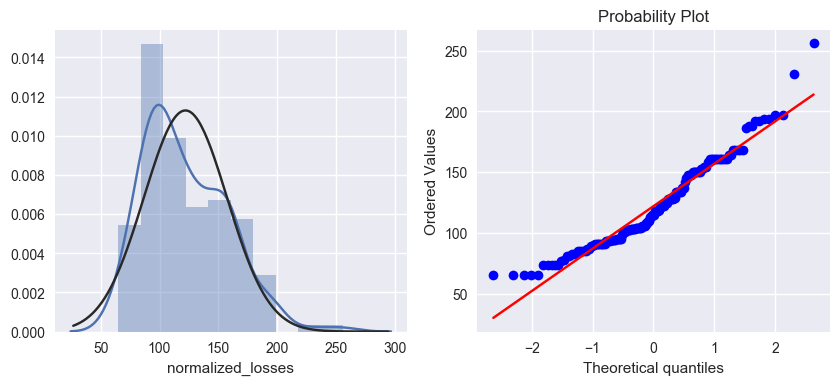

In [24]:
plt.figure(figsize=(10, 4), dpi=100)
plt.subplot(121)
sns.distplot(dfy, fit=sp.stats.norm)
plt.subplot(122)
sp.stats.probplot(np.array(dfy).reshape(164,), plot=plt)
plt.show()

### log transforamtion

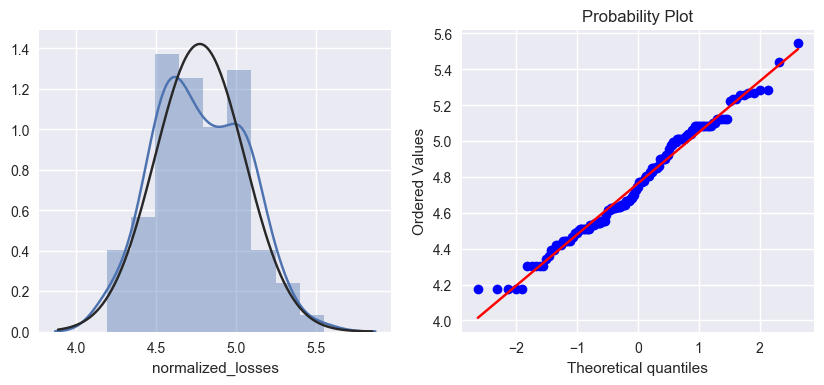

In [25]:
plt.figure(figsize=(10, 4), dpi=100)
plt.subplot(121)
sns.distplot(np.log(dfy+1), fit=sp.stats.norm)
plt.subplot(122)
sp.stats.probplot(np.array(np.log(dfy)).reshape(164,), plot=plt)
plt.show()

In [26]:
# log transformation
dfy2 = np.log1p(dfy2)

### categorical features distribution

In [27]:
def count_plot(df, feature):
    plt.figure(figsize=(12,16), dpi=200)
    for i in range(len(feature)):
        plt.subplot(4, 2, i+1)
        a=sns.countplot(df[feature[i]])
        plt.setp(a.get_xticklabels(), rotation=90)
        plt.tight_layout()

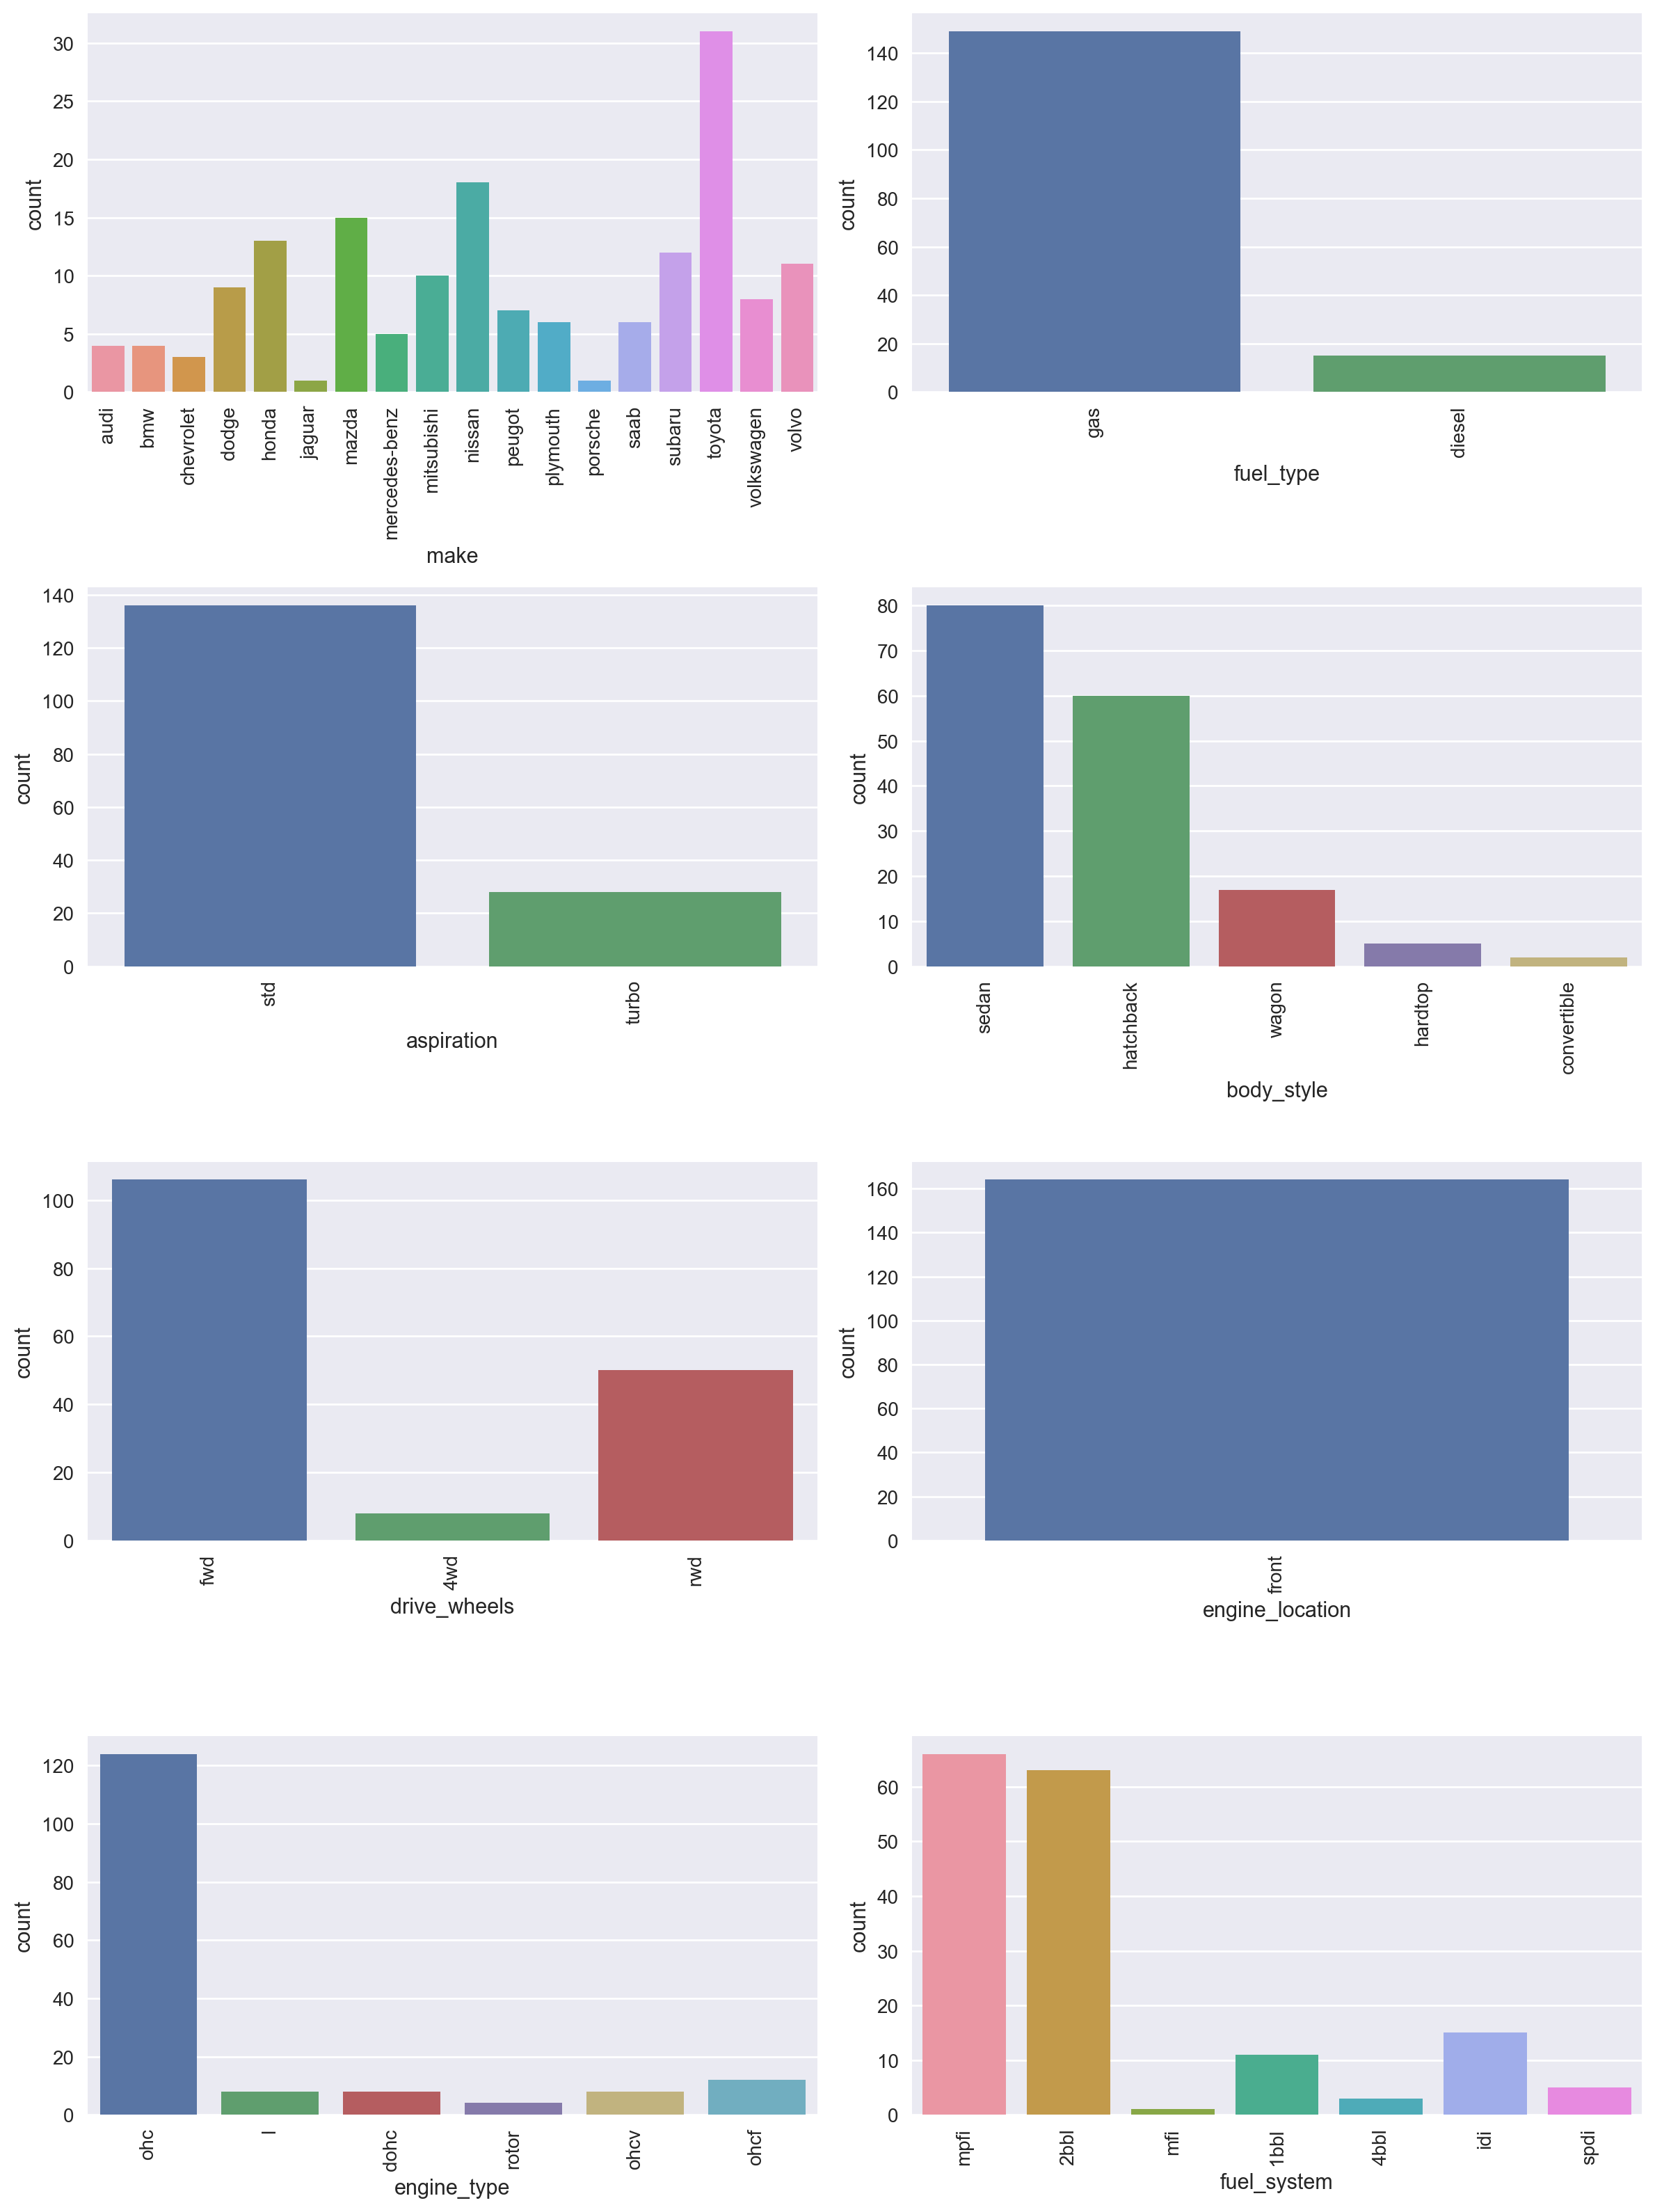

In [28]:
count_plot(dfX, categorical)

In [29]:
def box_plot(df, dfy, feature):
    plt.figure(figsize=(12,16), dpi=200)
    for i in range(len(feature)):
        plt.subplot(4, 2, i+1)
        a = sns.boxplot(x=df[feature[i]], y=dfy, data=df)
        plt.tight_layout()
        plt.setp(a.get_xticklabels(), rotation=90)
        plt.title(feature[i])

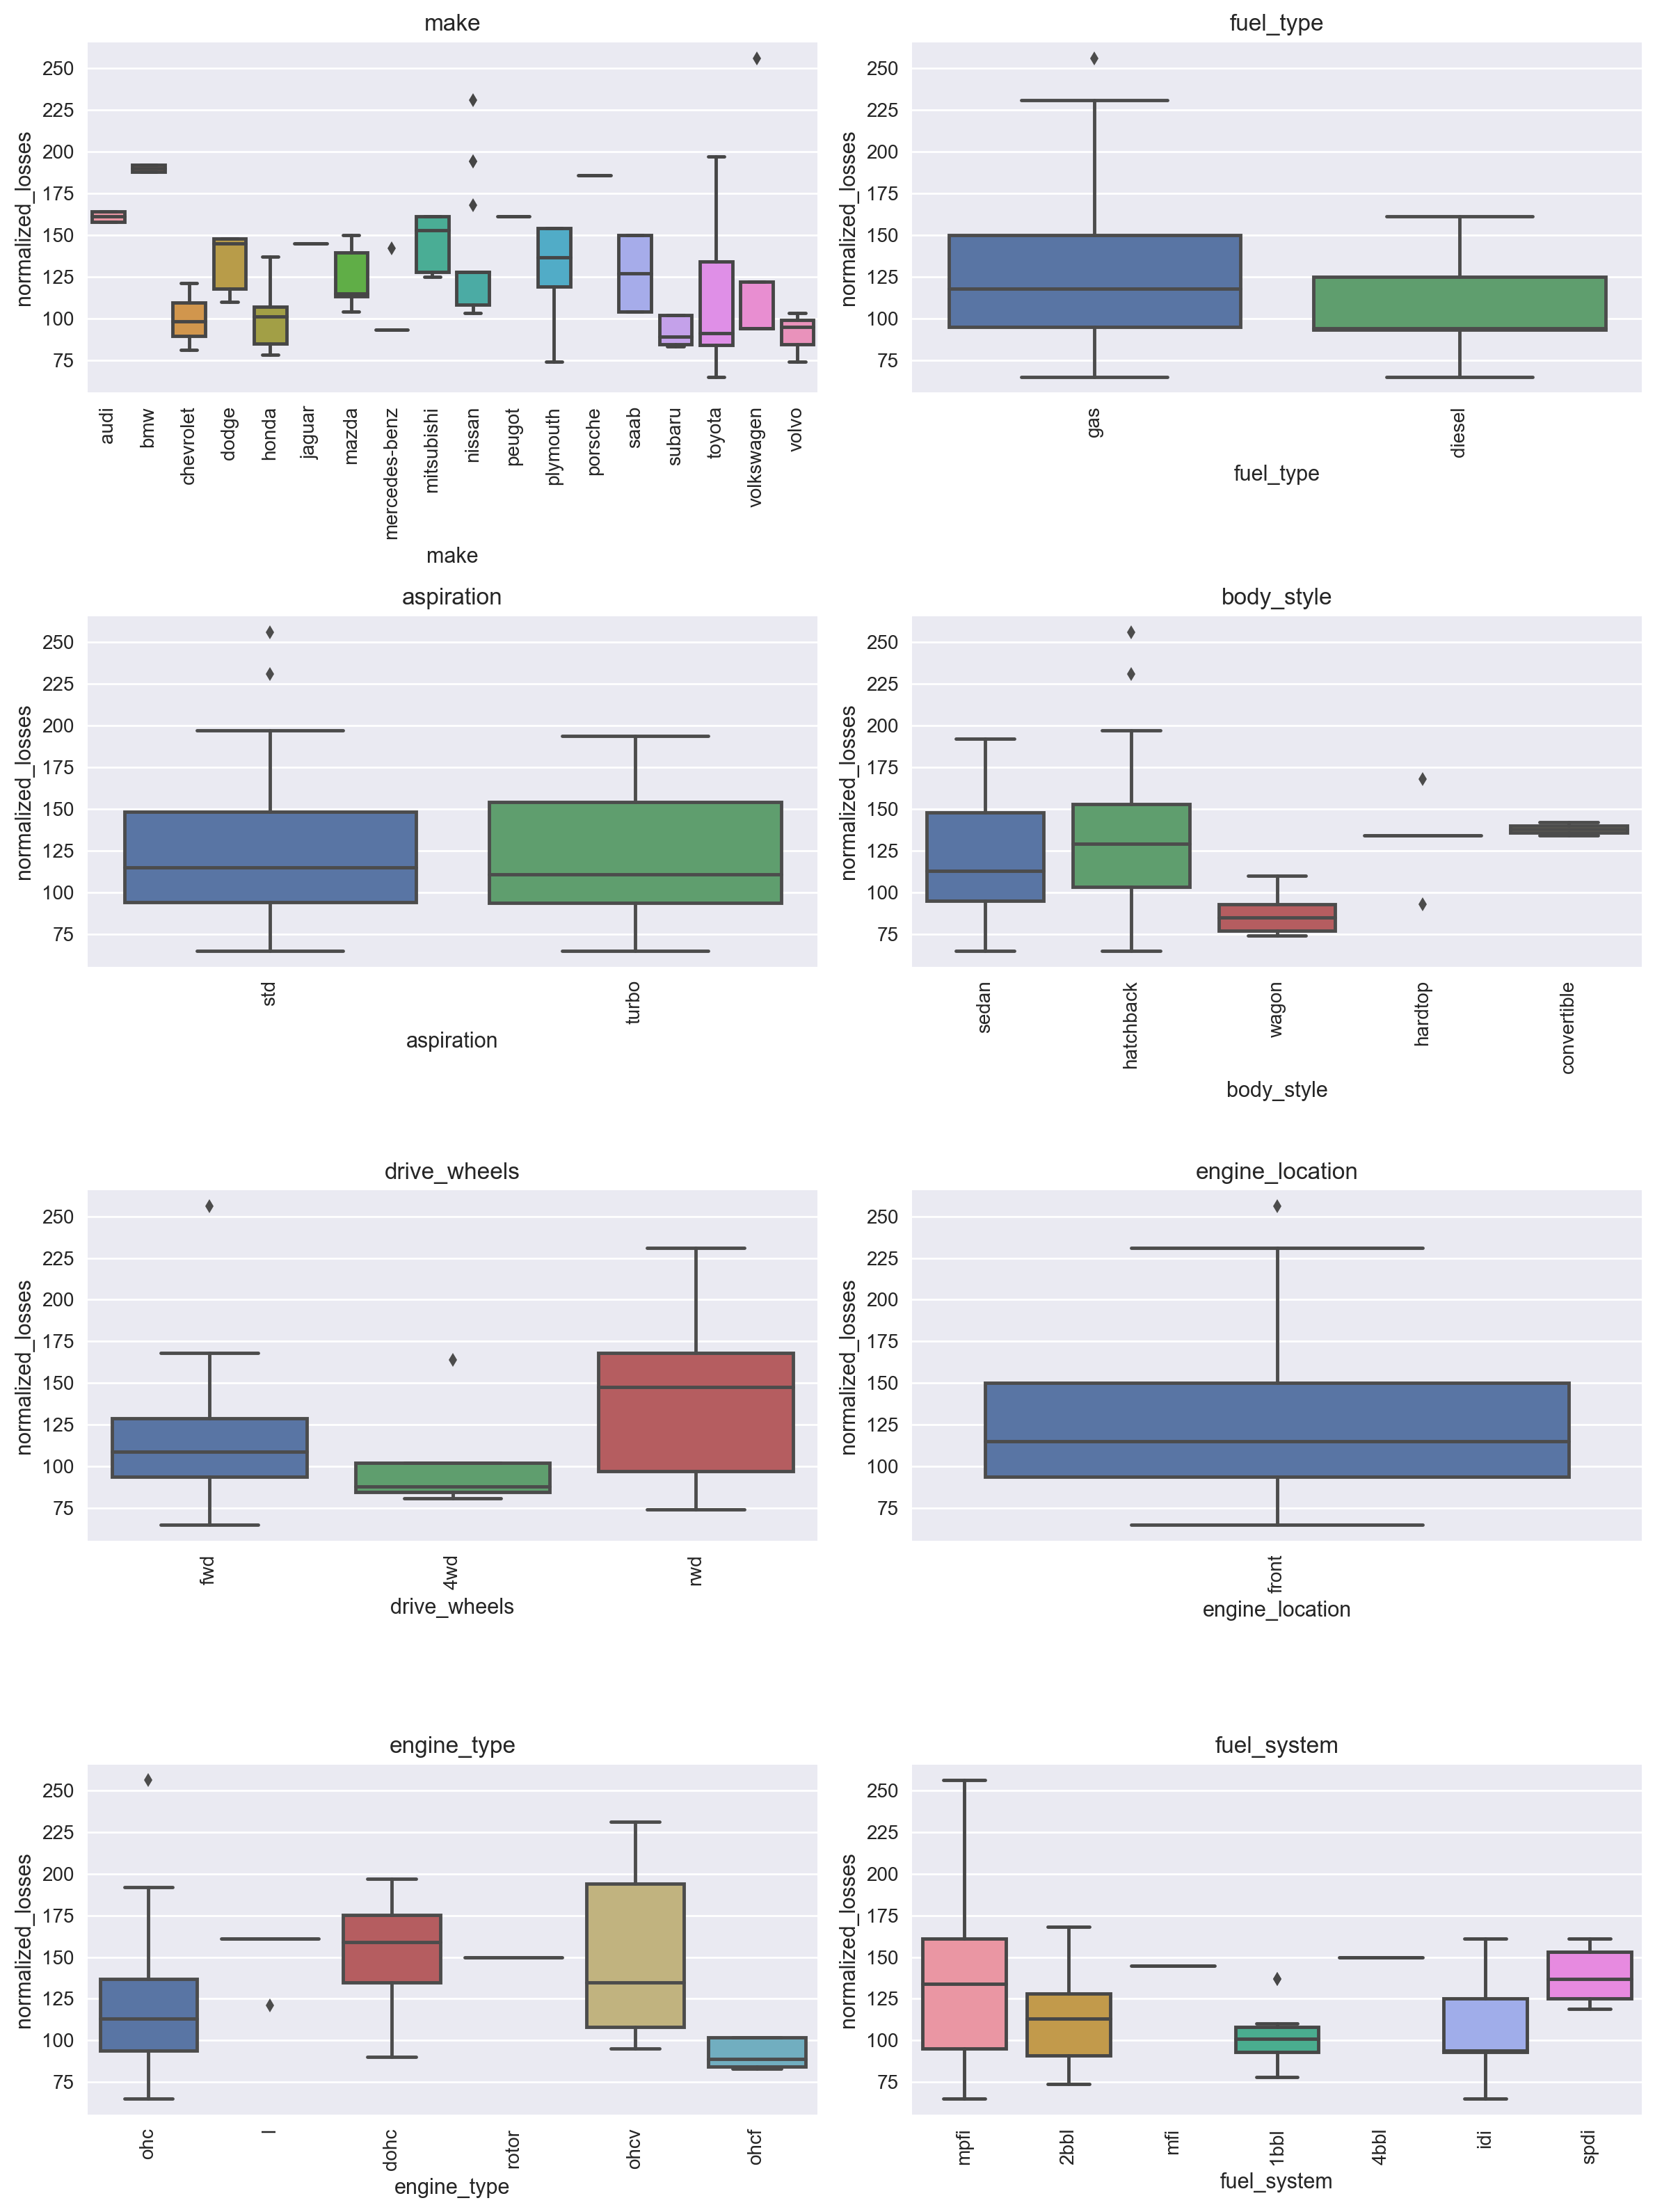

In [30]:
box_plot(dfX, dfy, categorical)

### numeric features distribution

In [31]:
def dist_plot(df, feature):
    plt.figure(figsize=(10,24), dpi=150)
    for i in range(len(feature)):
        plt.subplot(8, 2, i+1)
        sns.distplot(df[feature[i]], fit = sp.stats.norm, color="deepskyblue")
        plt.tight_layout()

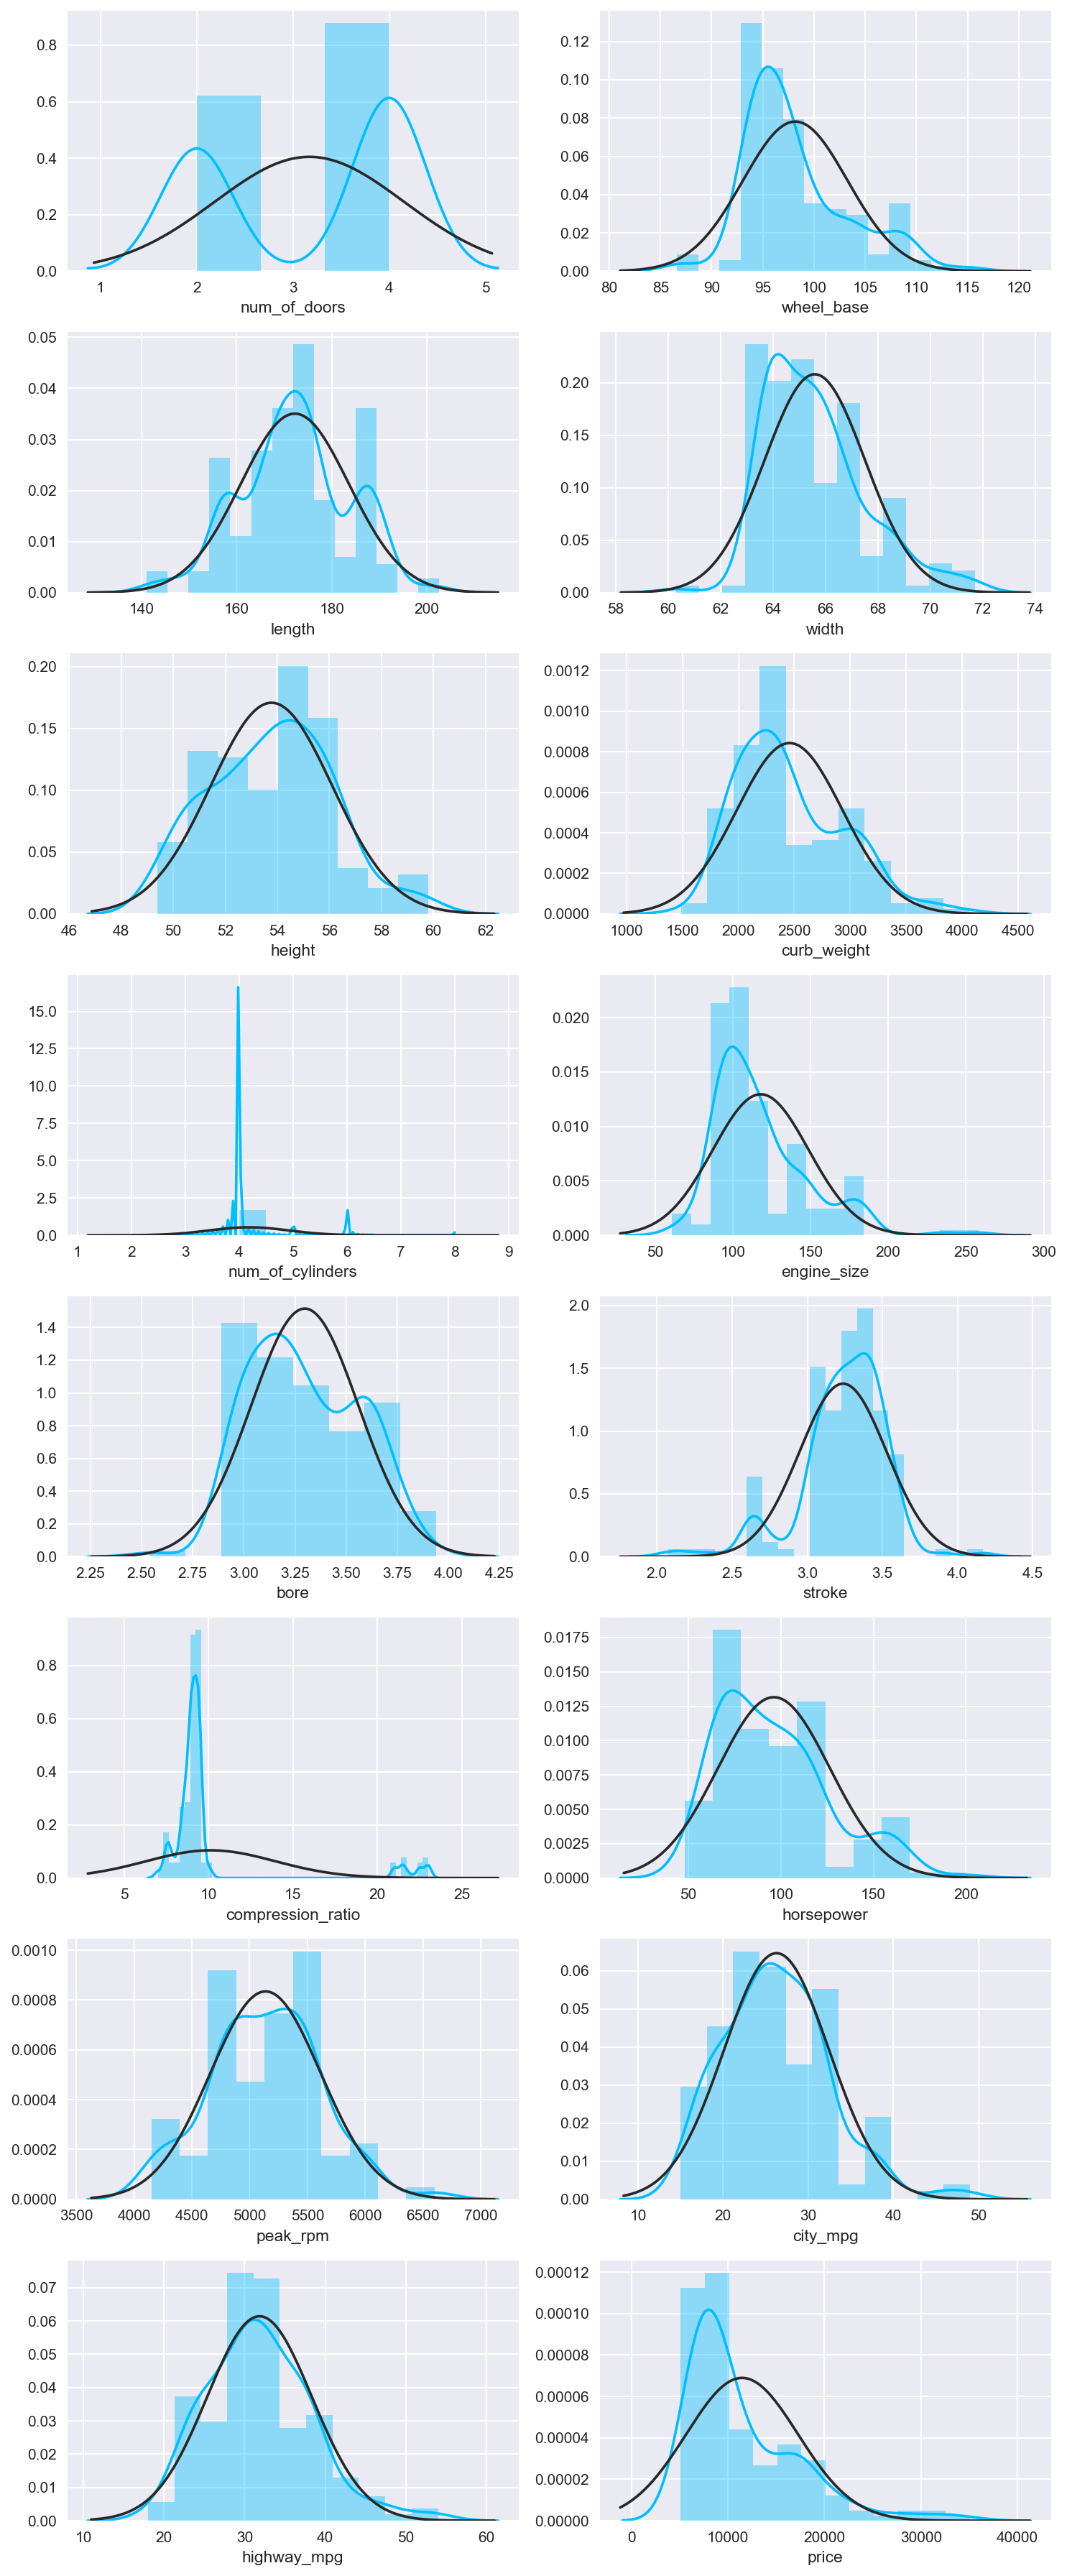

In [32]:
dist_plot(dfX, numeric)
# "wheel_base", "width", "curb_weight", "engine_size", "num-of-cylinders", "horsepower", "price"

In [33]:
# function making correlation matrix 
def corrmatrix(df):
    corrmat = df.corr()
    plt.subplots(figsize=(12, 12), dpi=200)
    sns.heatmap(corrmat, square=True, cmap='coolwarm', annot=True)

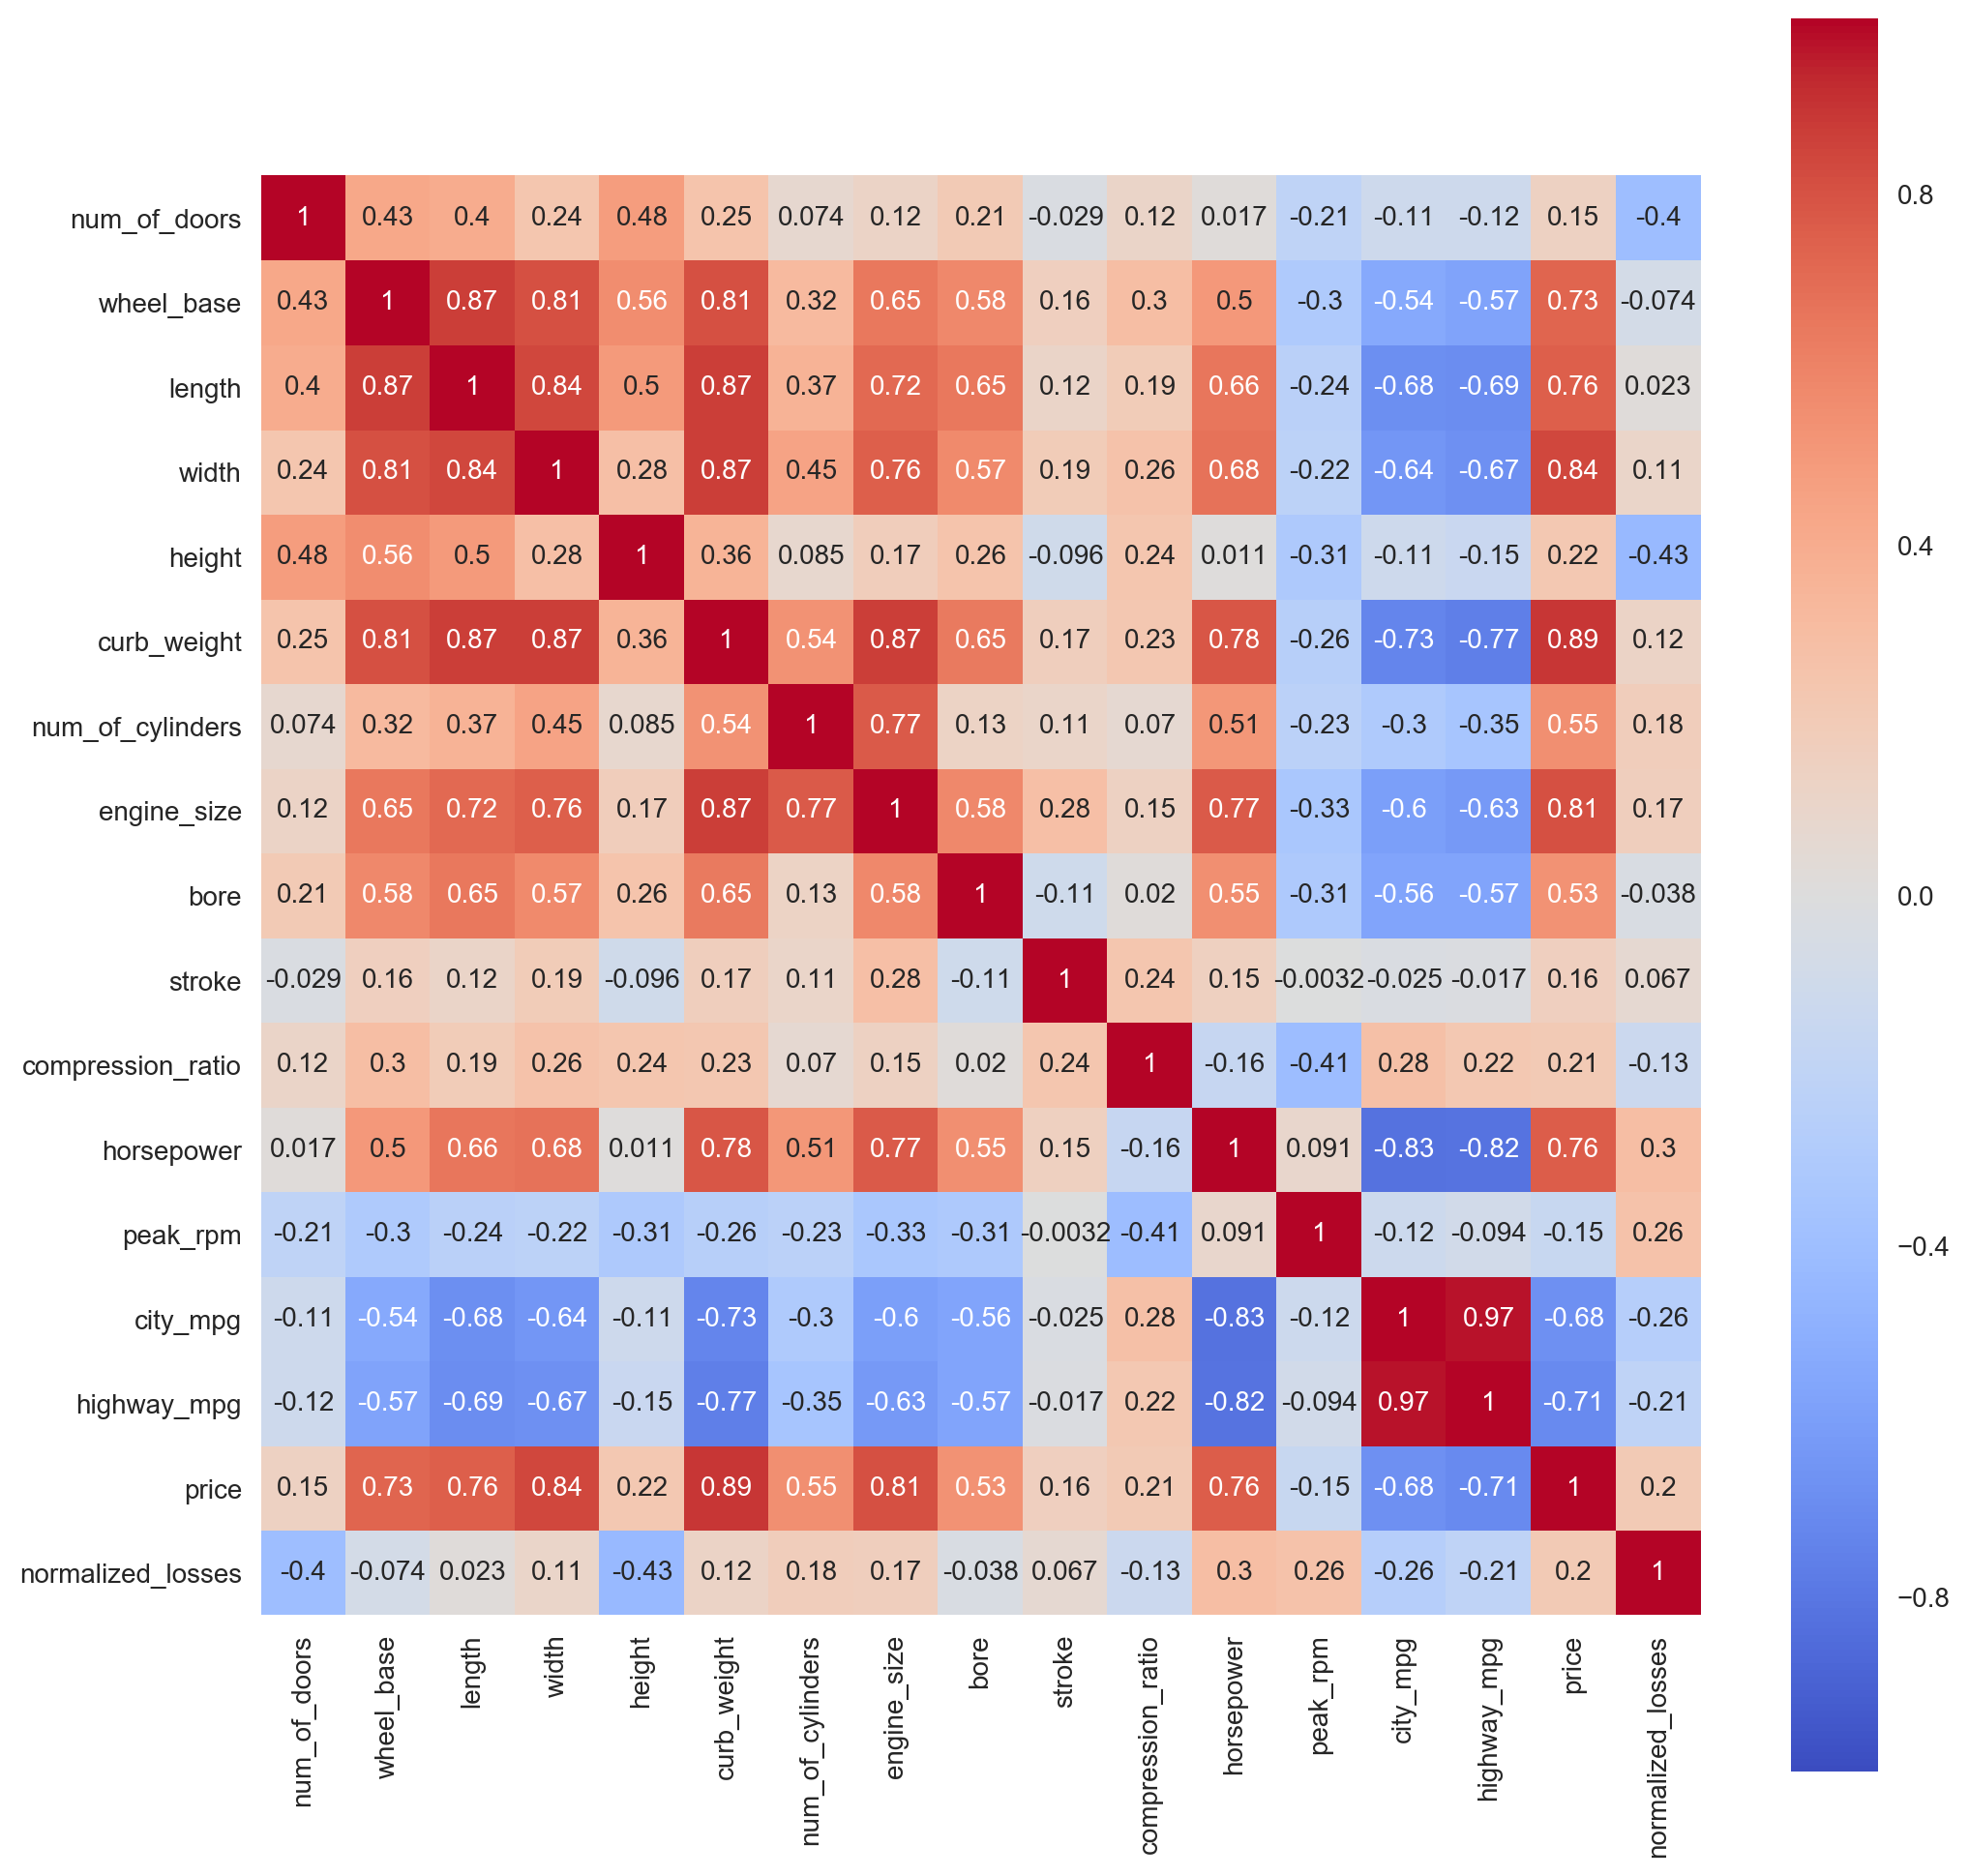

In [34]:
corrmatrix(pd.concat([dfX, dfy], axis=1))

In [35]:
# log transformation
dfX2[["wheel_base", "width", "curb_weight", "engine_size", "num_of_cylinders", "horsepower", "price"]] = np.log1p(dfX2[["wheel_base", "width", "curb_weight", "engine_size", "num_of_cylinders", "horsepower", "price"]])

In [36]:
# remove engine_location
dfX2 = dfX2.drop("engine_location", axis=1)

### train / test data split

In [37]:
def idx_sort(df):
    df = df.reset_index()
    df = df.iloc[:, 1:]
    return df

dfX2 = idx_sort(dfX2)
dfy2 = idx_sort(dfy2)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX2, dfy2,  test_size=0.20, random_state=3)

### Imputation NaN values

In [39]:
def missing(df):
    missing_pct = df.isnull().sum()
    missing_pct = missing_pct.sort_values(ascending=False)
    plt.figure(figsize=(5,7), dpi=100)
    sns.barplot(y=missing_pct.index, x=missing_pct.values, alpha=0.9, color="r", orient="h")
    plt.xlabel("Missing_pct", fontsize=12)
    plt.title("Missing values in each column", fontsize=15)

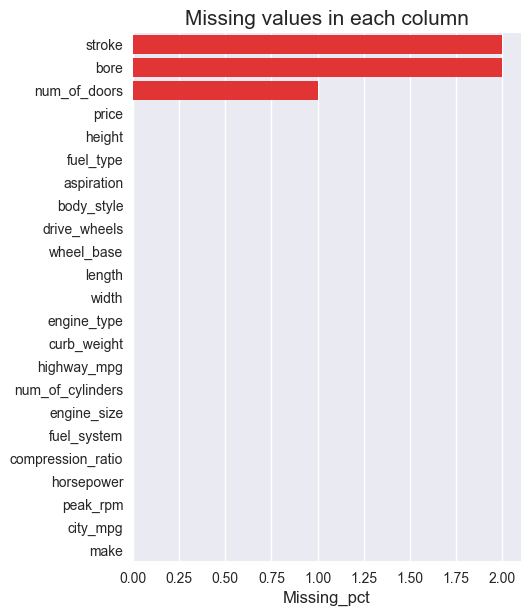

In [40]:
missing(X_train)

#### num-of-doors

In [41]:
X_train[X_train["num_of_doors"].isnull()]

make fuel_type aspiration  num_of_doors body_style drive_wheels  \
17  dodge       gas      turbo           NaN      sedan          fwd   

    wheel_base  length     width  height  curb_weight engine_type  \
17    4.550714   157.3  4.171306    50.6      7.69257         ohc   

    num_of_cylinders  engine_size fuel_system  bore  stroke  \
17          1.609438      4.59512        mpfi  3.03    3.39   

    compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg     price  
17                7.6    4.634729    5500.0      24.0         30.0  9.054739

#### stroke, bore 

In [42]:
X_train[X_train["stroke"].isnull()]

make fuel_type aspiration  num_of_doors body_style drive_wheels  \
40  mazda       gas        std           2.0  hatchback          rwd   
39  mazda       gas        std           2.0  hatchback          rwd   

    wheel_base  length     width  height  curb_weight engine_type  \
40    4.567468   169.0  4.200205    49.6     7.775276       rotor   
39    4.567468   169.0  4.200205    49.6     7.775276       rotor   

    num_of_cylinders  engine_size fuel_system  bore  stroke  \
40          1.098612      4.26268        4bbl   NaN     NaN   
39          1.098612      4.26268        4bbl   NaN     NaN   

    compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg     price  
40                9.4    4.624973    6000.0      17.0         23.0  9.379746  
39                9.4    4.624973    6000.0      17.0         23.0  9.300729

In [43]:
from sklearn.preprocessing import Imputer
# handle missing values on stroke, bore, num-of-doors , to minimize outlier's effect, use median 
imr_median = Imputer(missing_values="NaN", strategy="median", axis=0)

imr = imr_median.fit(dfX2[["num_of_doors", "bore", "stroke"]])
X_train[["num_of_doors", "bore", "stroke"]] = imr.transform(X_train[["num_of_doors", "bore", "stroke"]])
X_test[["num_of_doors", "bore", "stroke"]] = imr.transform(X_test[["num_of_doors", "bore", "stroke"]])


/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sinsanghun/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

## Standardization

In [44]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std = std.fit(X_train[numeric])
X_train_std = pd.DataFrame(std.transform(X_train[numeric]), columns=numeric)
X_test_std = pd.DataFrame(std.transform(X_test[numeric]), columns=numeric)

## One hot encoding for categorical variables

In [45]:
# because removing engine_location 
categorical = ["make", "fuel_type", "aspiration",  "body_style", "drive_wheels","engine_type", "fuel_system"]

In [46]:
dummy_categorical = pd.get_dummies(dfX2[categorical])
X_train_cat = dummy_categorical.loc[X_train.index]
X_test_cat = dummy_categorical.loc[X_test.index]

In [47]:
X_train_cat = idx_sort(X_train_cat)
X_test_cat = idx_sort(X_test_cat)

In [48]:
X_train = pd.concat([X_train_std, X_train_cat], axis=1)
X_test = pd.concat([X_test_std, X_test_cat], axis=1)

In [49]:
X_test.shape

(33, 59)

In [50]:
y_train = idx_sort(y_train)
y_test = idx_sort(y_test)

----

## Linear regression

In [51]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_losses   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     9.033
Date:                Fri, 01 Sep 2017   Prob (F-statistic):           6.20e-18
Time:                        00:52:07   Log-Likelihood:                 102.65
No. Observations:                 131   AIC:                            -105.3
Df Residuals:                      81   BIC:                             38.46
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
num_of_doors              -0

This summary shows there are two major problems I should solve. First, There are many coefficients of features which is not statistically significant. Second, I can comfirm multicollinearity problem on this summary report.



In [52]:
def pred_plot(X, y , model):
    plt.figure(figsize=(10, 4), dpi=150)
    plt.subplot(121)
    plt.scatter(y, model.predict(X), color="lightseagreen", alpha=0.7)
    plt.xlabel("actual value")
    plt.ylabel("predicted value")
    plt.title("actual-predict value")
    
    # residual plot 
    plt.subplot(122)
    plt.scatter(model.predict(X), model.resid, c="deepskyblue", alpha=0.7)
    plt.hlines(y=0, xmin=min(model.predict(X)), xmax=max(model.predict(X)), lw=2, color="red", alpha=0.7)
    plt.xlabel("Predicted Value")
    plt.ylabel("Residuals")
    plt.title("Predicted - Residual")
    
    plt.tight_layout()
    plt.show()

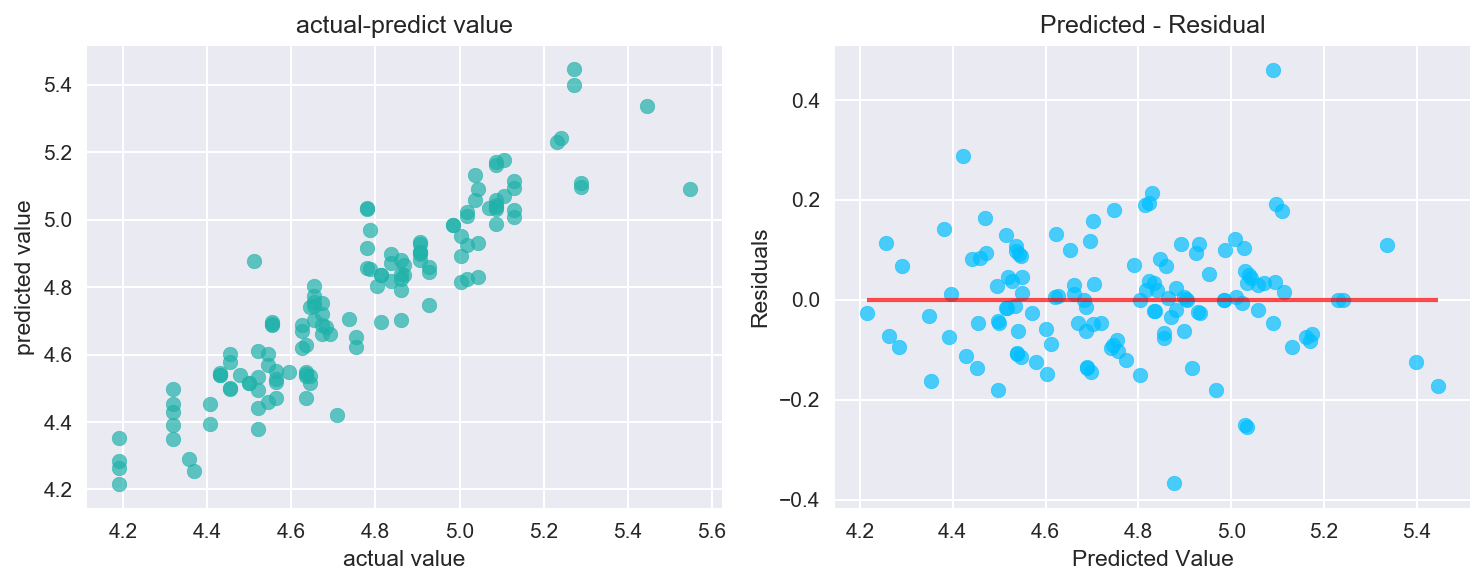

In [53]:
pred_plot(X_train, y_train, model)

##  Outliers through leverage and residuals

In [54]:
influence = model.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train) - model.df_model - 1)
print("Fox's recommendation :", fox_cr)
idx = np.where(cooks_d2 > fox_cr)[0]

Fox's recommendation : 0.0493827160494


/Users/sinsanghun/anaconda/lib/python2.7/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [55]:
X_outlier = X_train.iloc[idx, :]
y_outlier = y_train.iloc[idx]

In [56]:
print("the numer of outliers : ", len(idx))
print(idx)

the numer of outliers :  7
[  7  25  64  89  99 121 129]


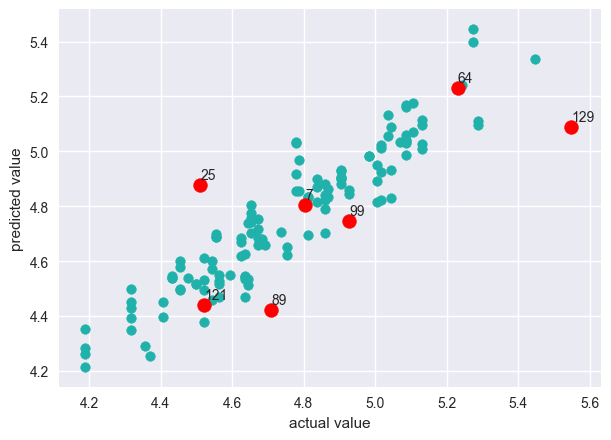

In [57]:
from statsmodels.graphics import utils

plt.figure(figsize=(7, 5), dpi=100)
plt.scatter(y_train, model.predict(X_train), color="lightseagreen")
plt.scatter(y_outlier, model.predict(X_outlier), color="red", s=100)
for i in range(len(idx)):
    plt.annotate(str(idx[i]), xy=(y_outlier.iloc[i], model.predict(X_outlier).iloc[i]), 
                 xytext=(y_outlier.iloc[i], model.predict(X_outlier).iloc[i]+0.02))
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show()

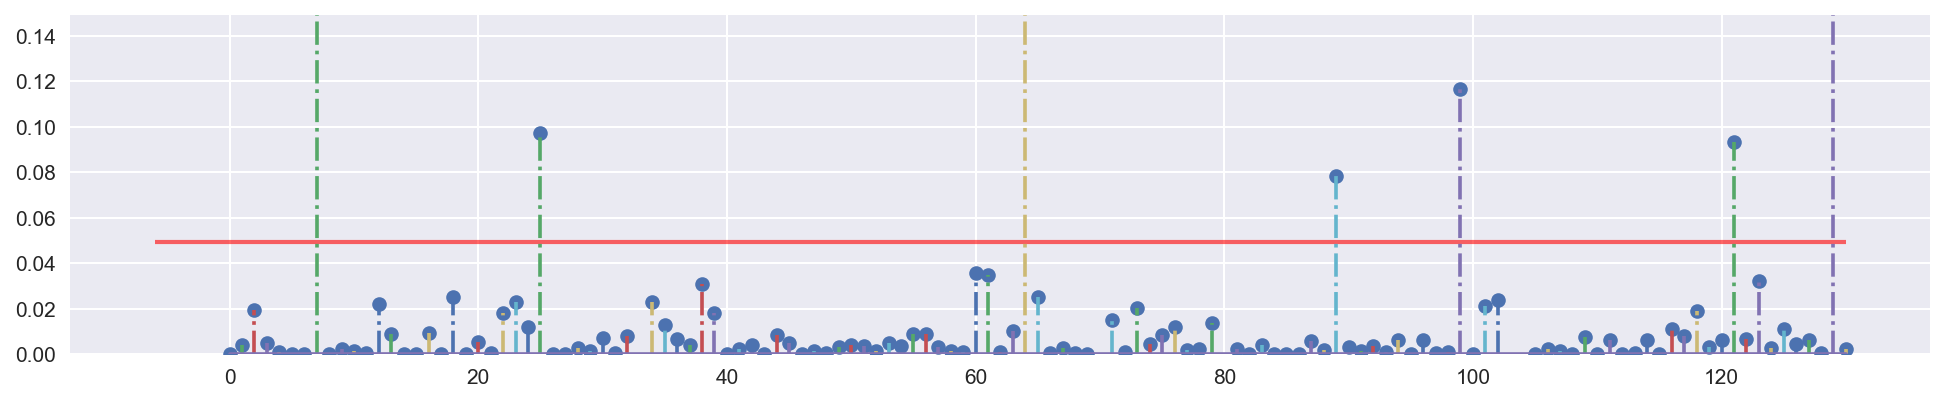

In [58]:
# cooks_d2 
plt.figure(figsize=(16, 3), dpi=150)
plt.stem(cooks_d2, "-.")
plt.ylim([0, fox_cr + 0.1])
plt.hlines(y=fox_cr, xmin=-1-5, xmax=130, lw=2, color="red",alpha=0.6)
plt.show()

In [59]:
from scipy.stats import zscore

resid = zscore(model.resid)**2
leverage = influence.hat_matrix_diag

out = pd.DataFrame({"index" : idx, "resid" : resid[idx].round(3), "leverage" : leverage[idx].round(3)})
out

index  leverage   resid
0      7     1.000   0.000
1     25     0.353  11.019
2     64     1.000   0.000
3     89     0.399   6.778
4     99     0.616   2.659
5    121     0.782   0.539
6    129     0.445  17.275

In [60]:
idx = out[out["resid"]!=0]["index"]
idx = np.array(idx)

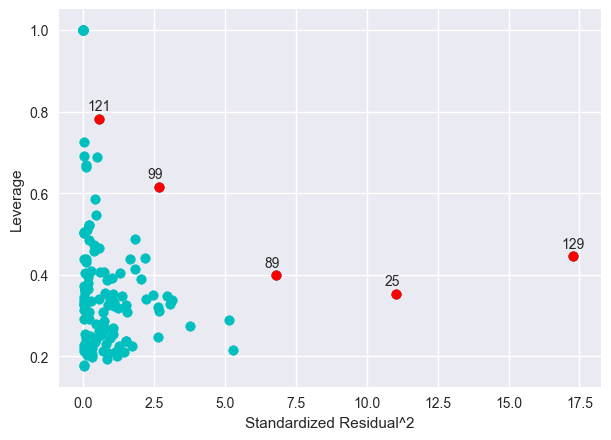

In [61]:
# to see leverange and residuals simultaneously
fig, ax = plt.subplots(figsize=(7,5), dpi=100)

plt.scatter(resid, leverage, color="c")

# for outlier data 
for i in idx:
    plt.scatter(resid[i], leverage[i], color="red")
    plt.annotate(str(i), xy=(resid[i], leverage[i]), xytext=(resid[i]-0.4, leverage[i]+0.02))

plt.xlabel("Standardized Residual^2")
plt.ylabel("Leverage")
plt.show()


In [62]:
y_train = y_train.drop(idx)
y_train = idx_sort(y_train)
X_train = X_train.drop(idx)
X_train = idx_sort(X_train)

## Regression again after removing outliers

In [63]:
reg = sm.OLS(y_train, X_train).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_losses   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     15.75
Date:                Fri, 01 Sep 2017   Prob (F-statistic):           1.12e-24
Time:                        00:52:10   Log-Likelihood:                 135.52
No. Observations:                 126   AIC:                            -171.0
Df Residuals:                      76   BIC:                            -29.23
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
num_of_doors              -0

I did confirm that multicolinearity is occured by dummy variables.  So, I could ignore it 

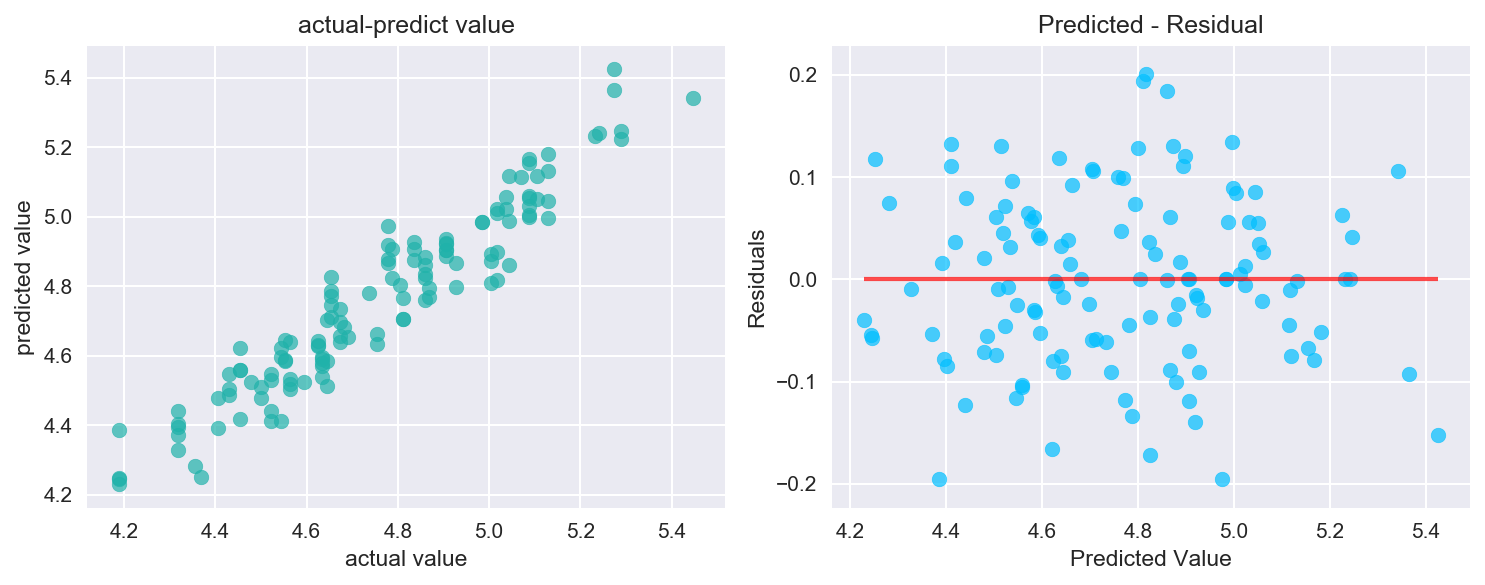

In [64]:
pred_plot(X_train, y_train, reg)

There are many the features not statistically significant on this summmury report. 
But, Still, I have problem of multicolinearity. To solve this problem and To avoid overfitting, I tried to use regularized regression like lasso, ridge, elastic net 

In [65]:
def pred_line_plot(dfy, dfX, model):
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error

    plt.figure(figsize=(12,4), dpi=200)
    pred = model.predict(dfX)
    plt.plot(range(len(dfX)), pred, label="PRED", alpha=0.8)
    plt.plot(range(len(dfX)), dfy, label="Y_TEST", alpha=0.8)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

    print("MSE :", mean_squared_error(dfy, model.predict(dfX)))
    print("R2 :", r2_score(dfy, model.predict(dfX)))

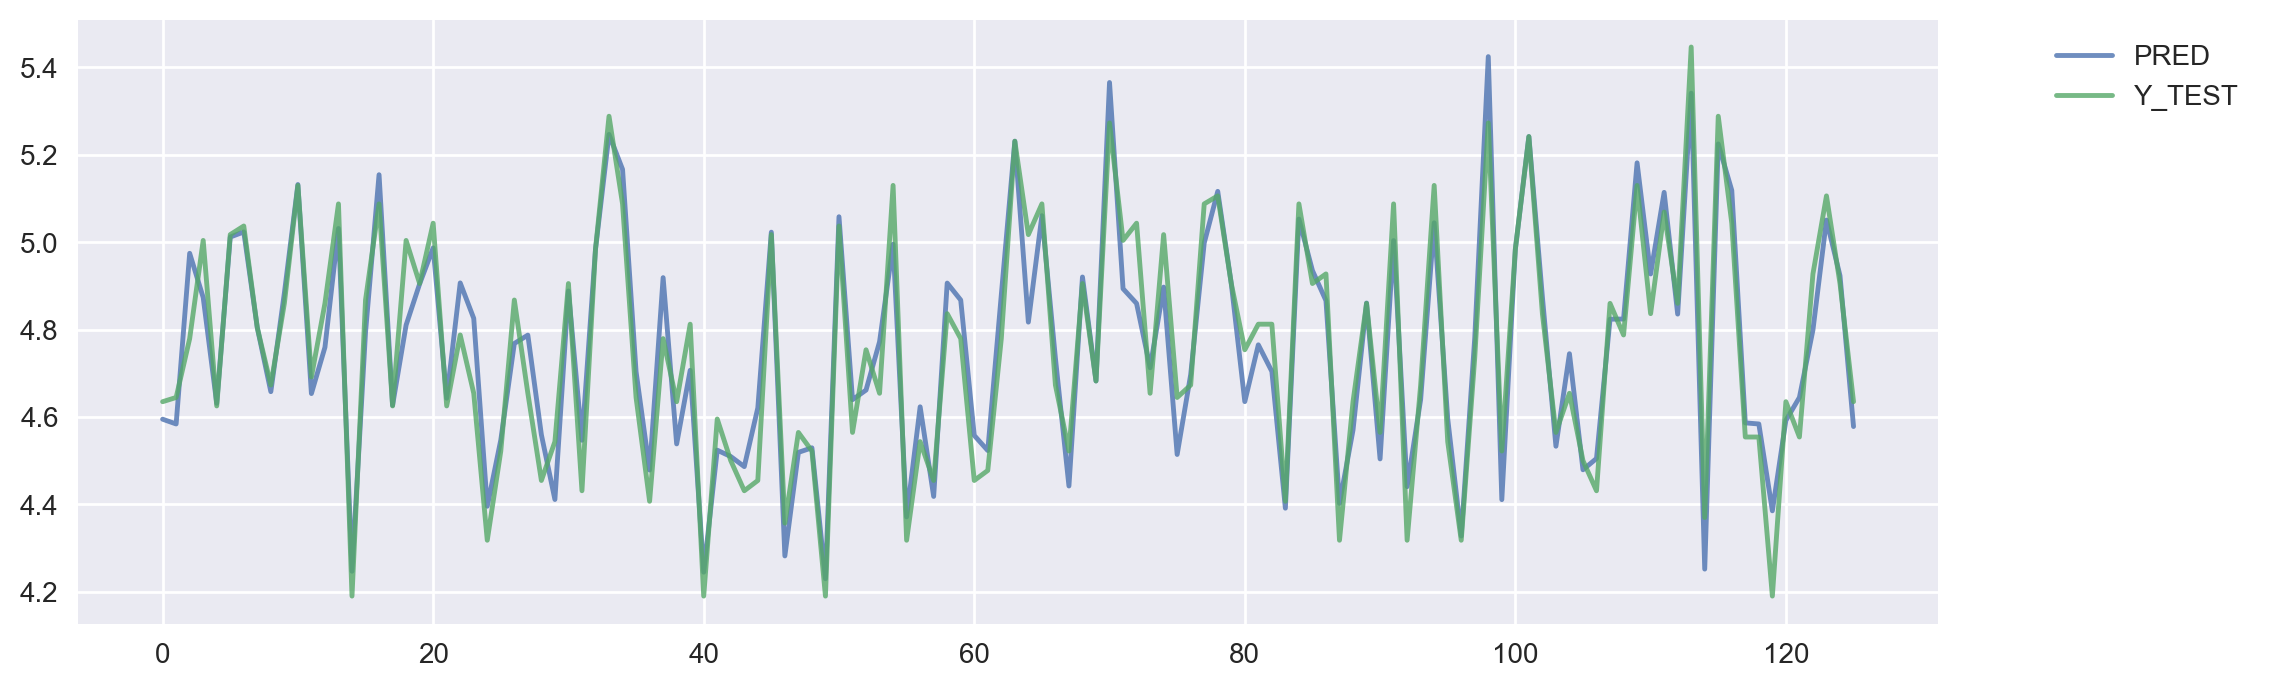

MSE : 0.00681213858564
R2 : 0.910340472142


In [66]:
pred_line_plot(y_train, X_train, reg)

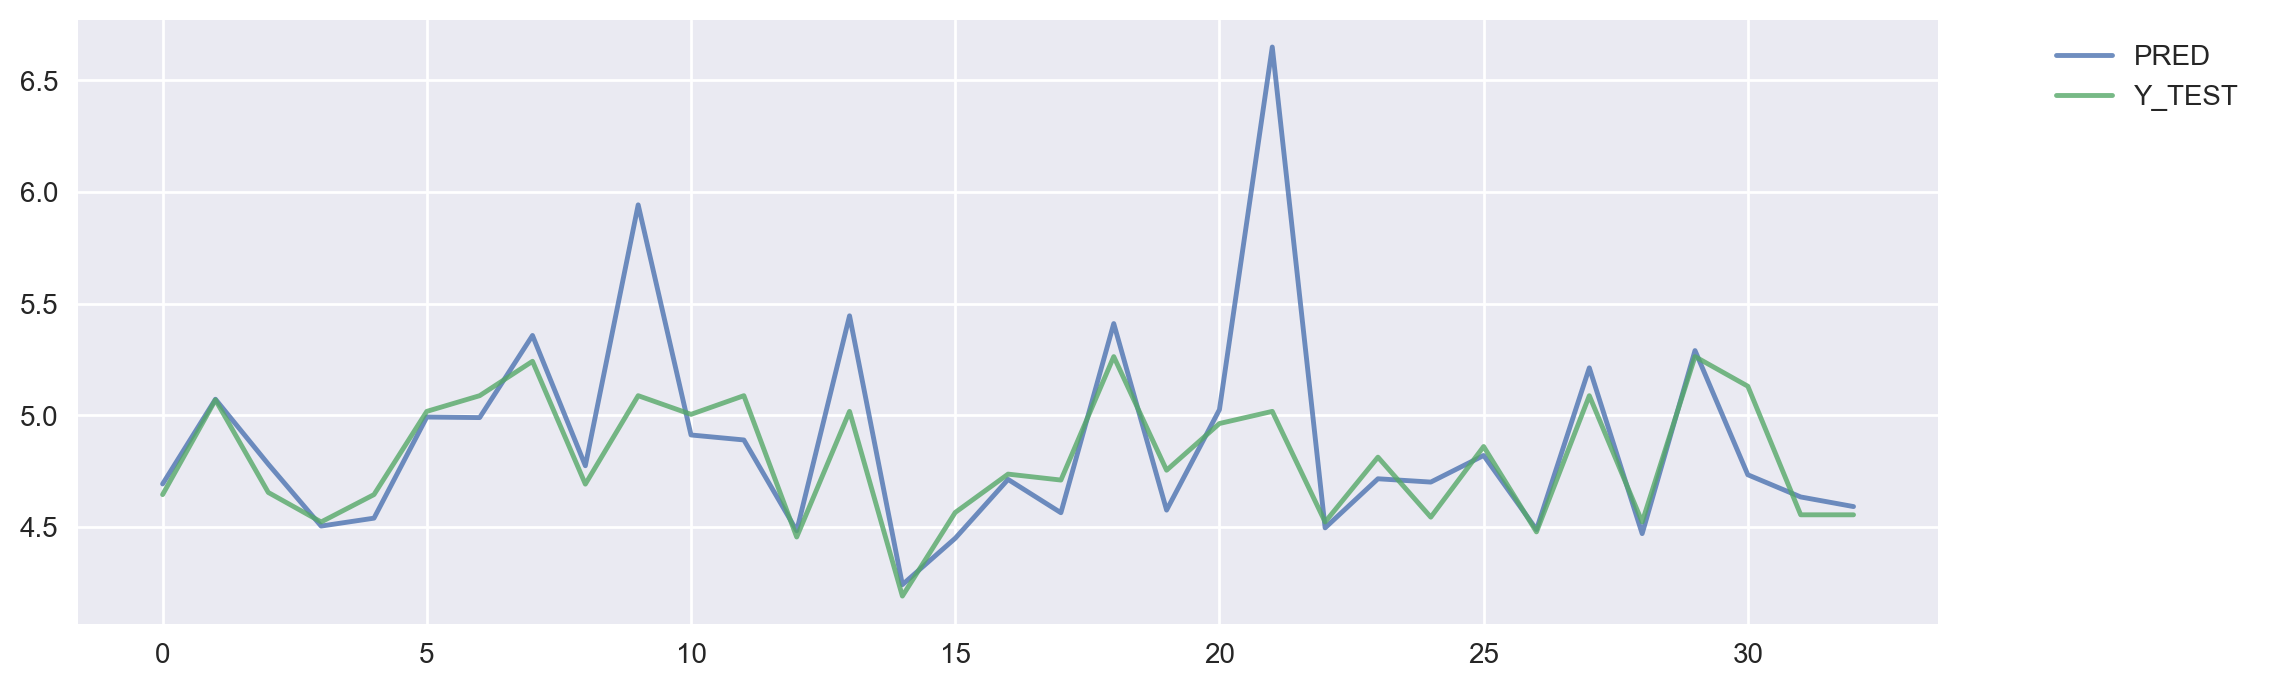

MSE : 0.121354518852
R2 : -0.594178582094


In [67]:
pred_line_plot(y_test, X_test, reg)

------

## Try to use Regularization model

In [68]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

## 1) Lasso Regression 

### Finding optimal alpha

/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal Alpha :  0.00104811313415


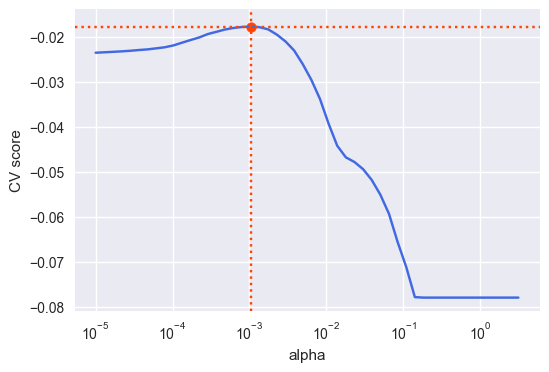

In [69]:
alphas = np.logspace(-5, 0.5, 50)

lasso_cv = LassoCV(alphas=alphas, cv=10)
lasso_cv.fit(X_train, y_train)

print("Optimal Alpha : ", lasso_cv.alpha_ )
optimal_lasso = lasso_cv.alpha_ 

scores = -lasso_cv.mse_path_.mean(axis=1)
plt.figure(dpi=100)
plt.semilogx(lasso_cv.alphas_, scores, color="royalblue")
plt.axhline(np.max(scores), linestyle=':', color="orangered")    
plt.axvline(lasso_cv.alpha_ , linestyle=':',color="orangered")
plt.scatter(lasso_cv.alpha_, np.max(scores), color="orangered")
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

In [70]:
lasso = LassoCV(alphas = [optimal_lasso]).fit(X_train, y_train)

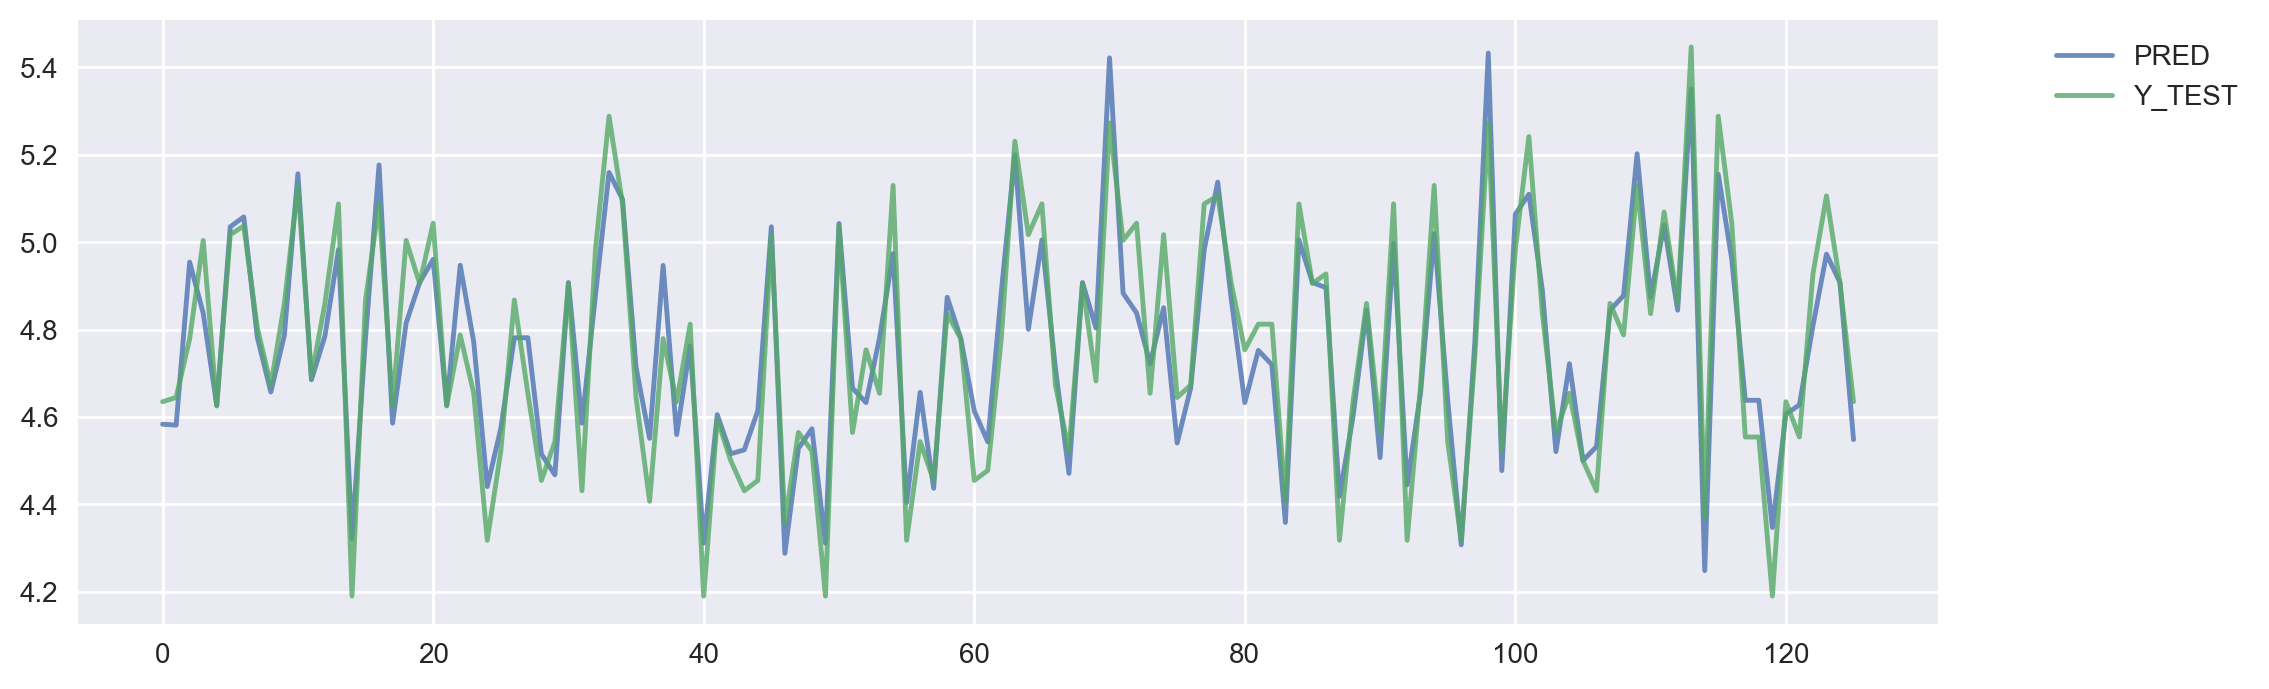

MSE : 0.00872539398102
R2 : 0.885158721468


In [71]:
pred_line_plot(y_train, X_train, lasso)

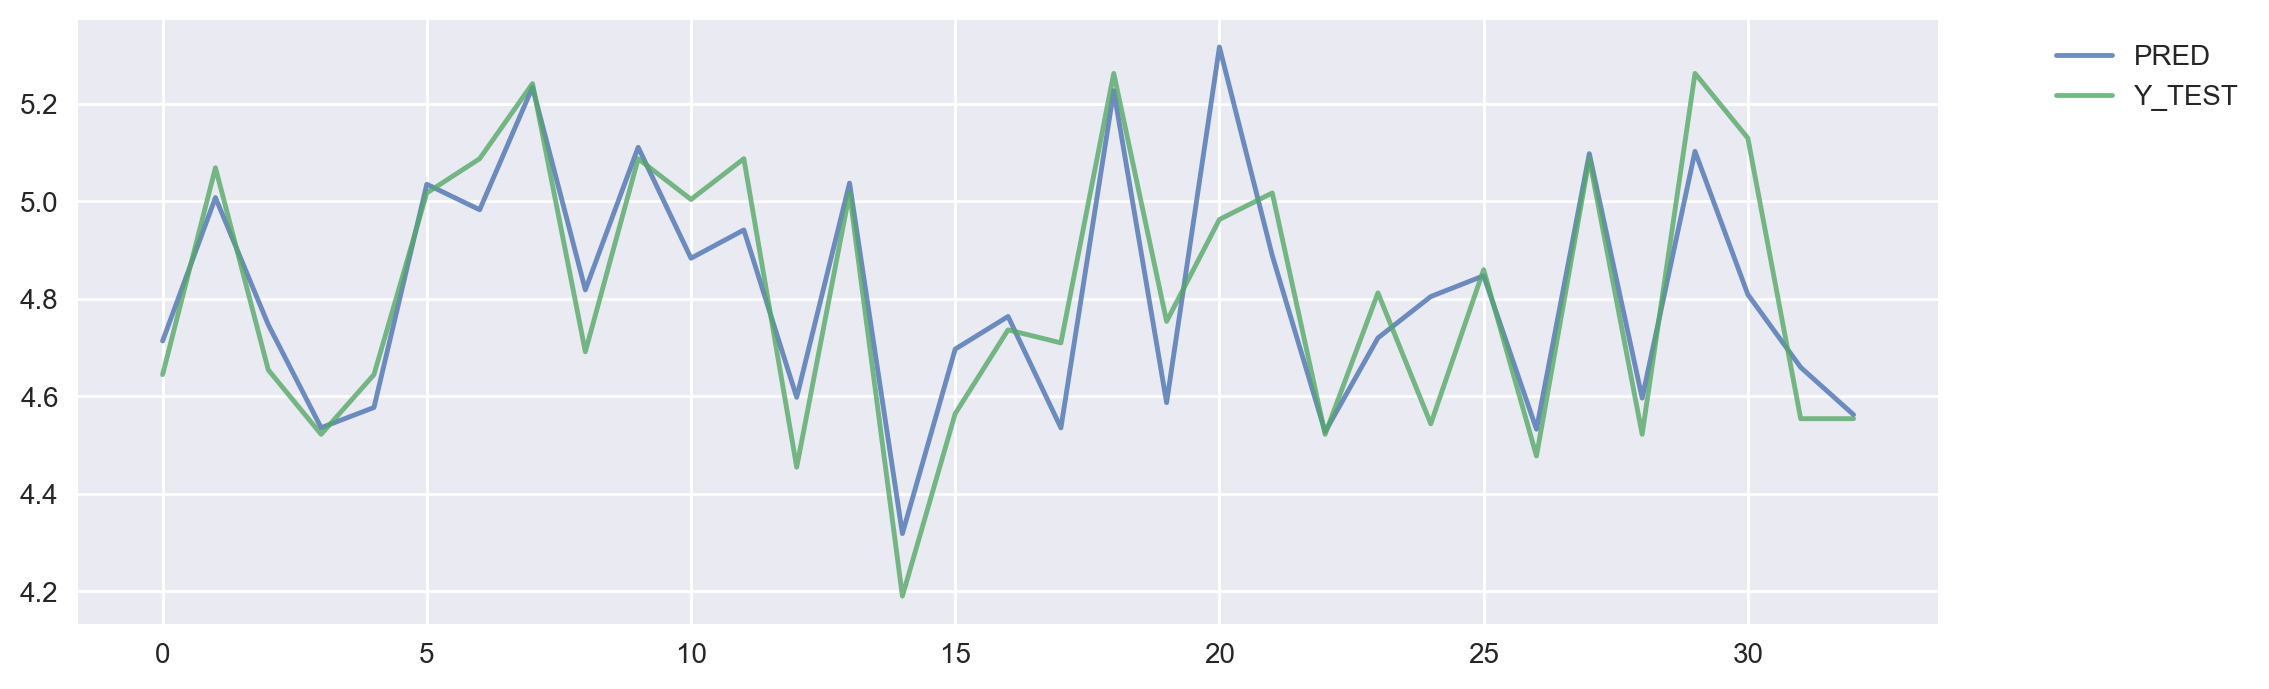

MSE : 0.0172234360595
R2 : 0.773743630349


In [72]:
pred_line_plot(y_test, X_test, lasso)

### Feature Selection

In [73]:
coef = pd.Series(lasso.coef_, index = X_train.columns)

In [74]:
print("--- Feature Selection ---")
print("Lasso picked " + str(sum(coef != 0)) + " variables and removed the other " +  str(sum(coef == 0)) + " variables")

--- Feature Selection ---
Lasso picked 35 variables and removed the other 24 variables


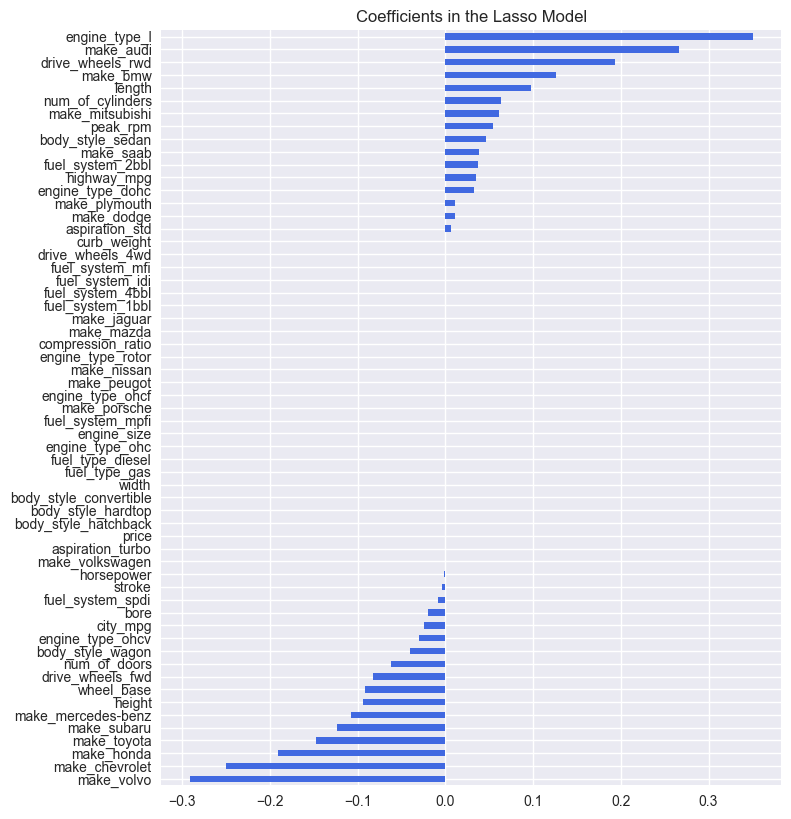

In [75]:
plt.figure(figsize=(8,10), dpi=100)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh", color="royalblue")
plt.title("Coefficients in the Lasso Model")
plt.show()

## 2) Ridge Regression

/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Optimal Alpha :  0.790604321091


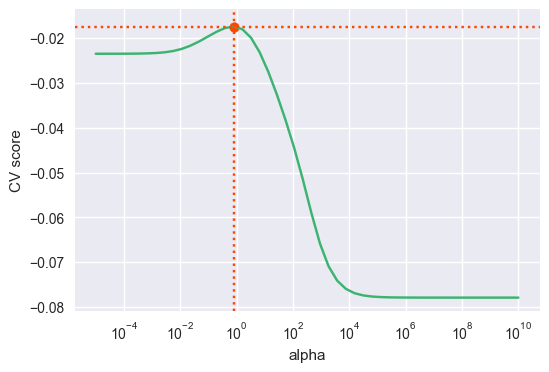

In [76]:
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score


ridge = Ridge()
alphas = np.logspace(-5, 10, 50)

scores = list()

for alpha in alphas:
    ridge.alpha = alpha
    this_scores = cross_val_score(ridge, X_train, y_train, "neg_mean_squared_error", cv=10)
    scores.append(np.mean(this_scores))

print("Optimal Alpha : ", alphas[np.argmax(scores)])    
optimal_ridge = alphas[np.argmax(scores)]

plt.figure(dpi=100)
plt.semilogx(alphas, scores, color="mediumseagreen")
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle=':', color="orangered")
plt.axvline(alphas[np.argmax(scores)] , linestyle=':', color="orangered")
plt.scatter(alphas[np.argmax(scores)], np.max(scores), color="orangered")
plt.show()

In [77]:
ridge = Ridge(alpha=optimal_ridge)
ridge.fit(X_train, y_train)

Ridge(alpha=0.79060432109077017, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

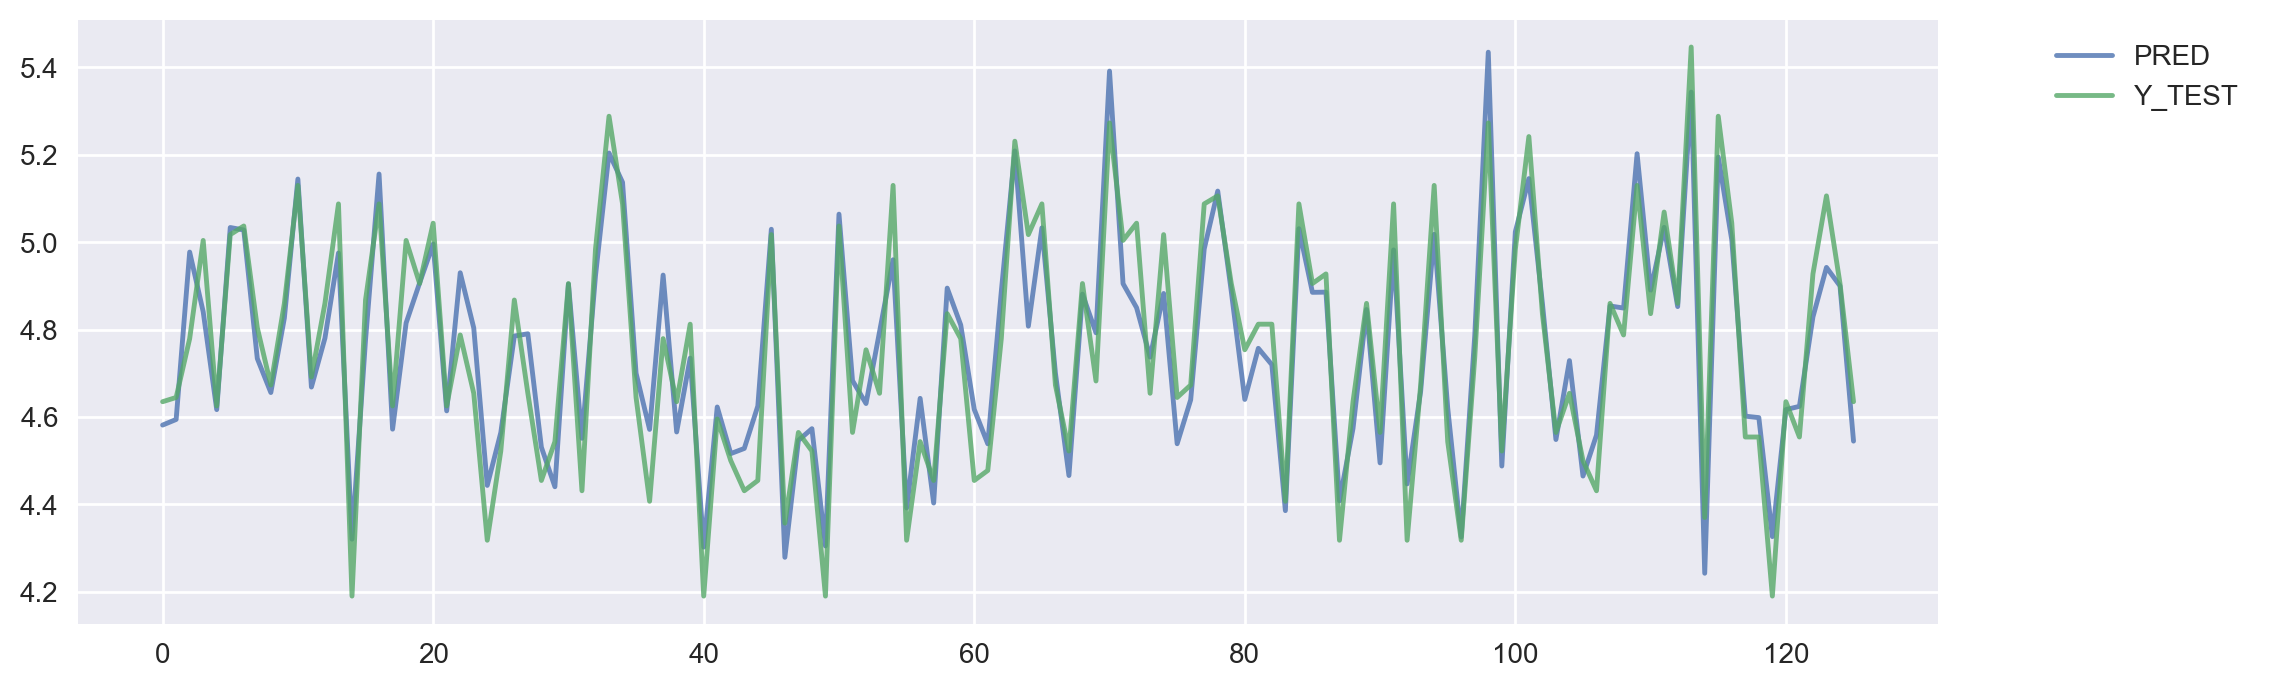

MSE : 0.00820562645217
R2 : 0.891999761275


In [78]:
pred_line_plot(y_train, X_train, ridge)

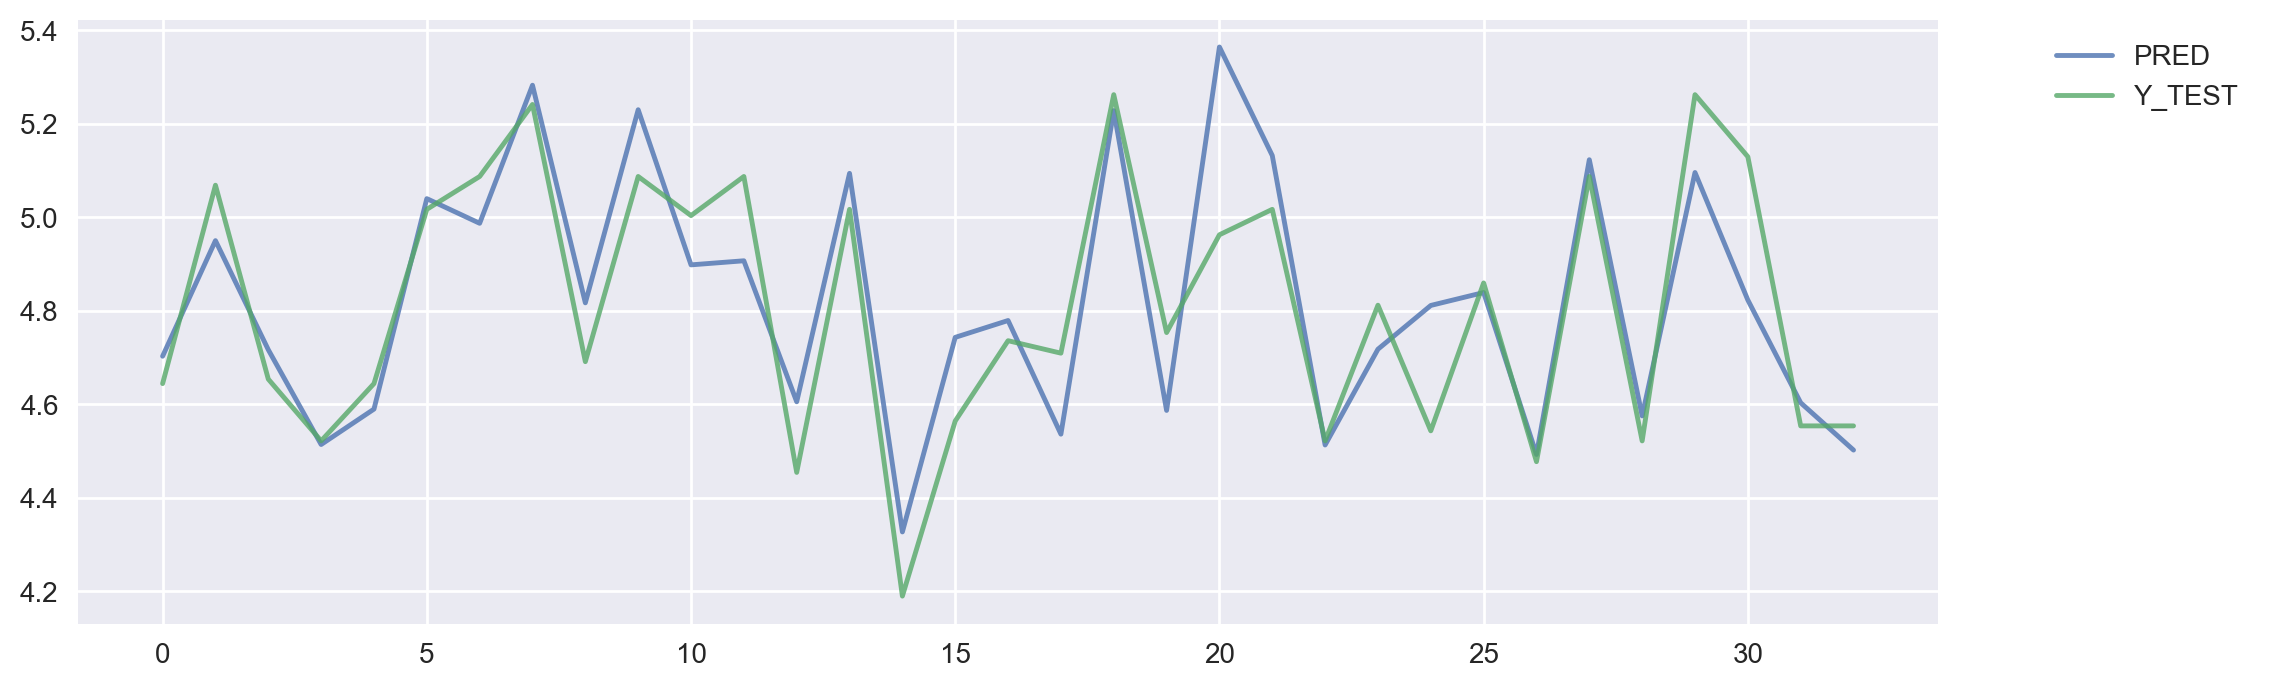

MSE : 0.0195319518669
R2 : 0.743417718373


In [79]:
pred_line_plot(y_test, X_test, ridge)

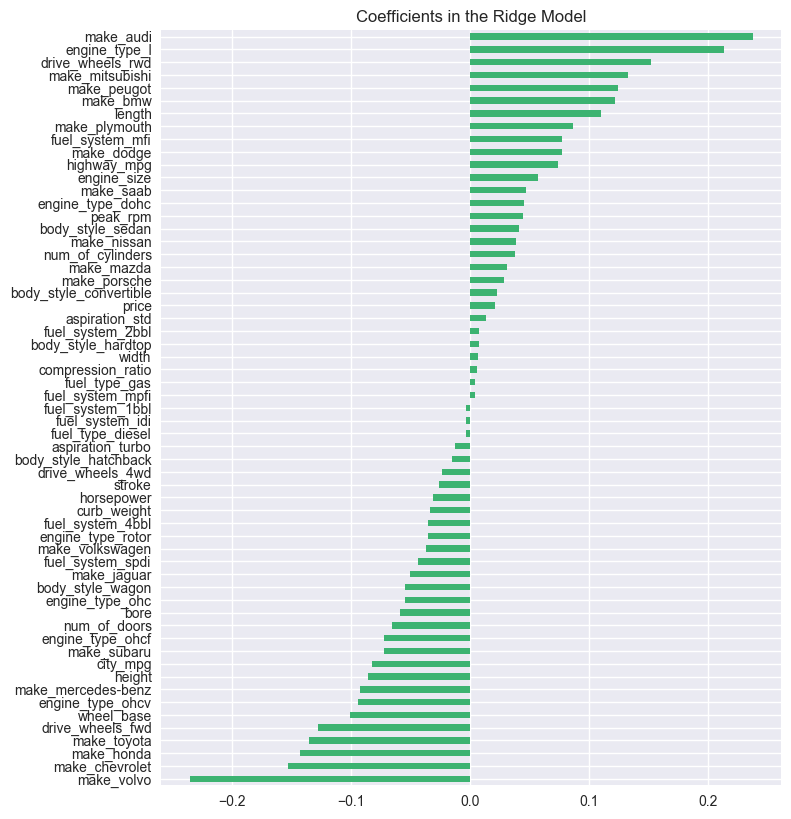

In [80]:
plt.figure(figsize=(8,10), dpi=100)
coef = pd.Series(ridge.coef_[0], index = X_train.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh", color="mediumseagreen")
plt.title("Coefficients in the Ridge Model")
plt.show()

## Predict plot - Test, Lasso, Ridge

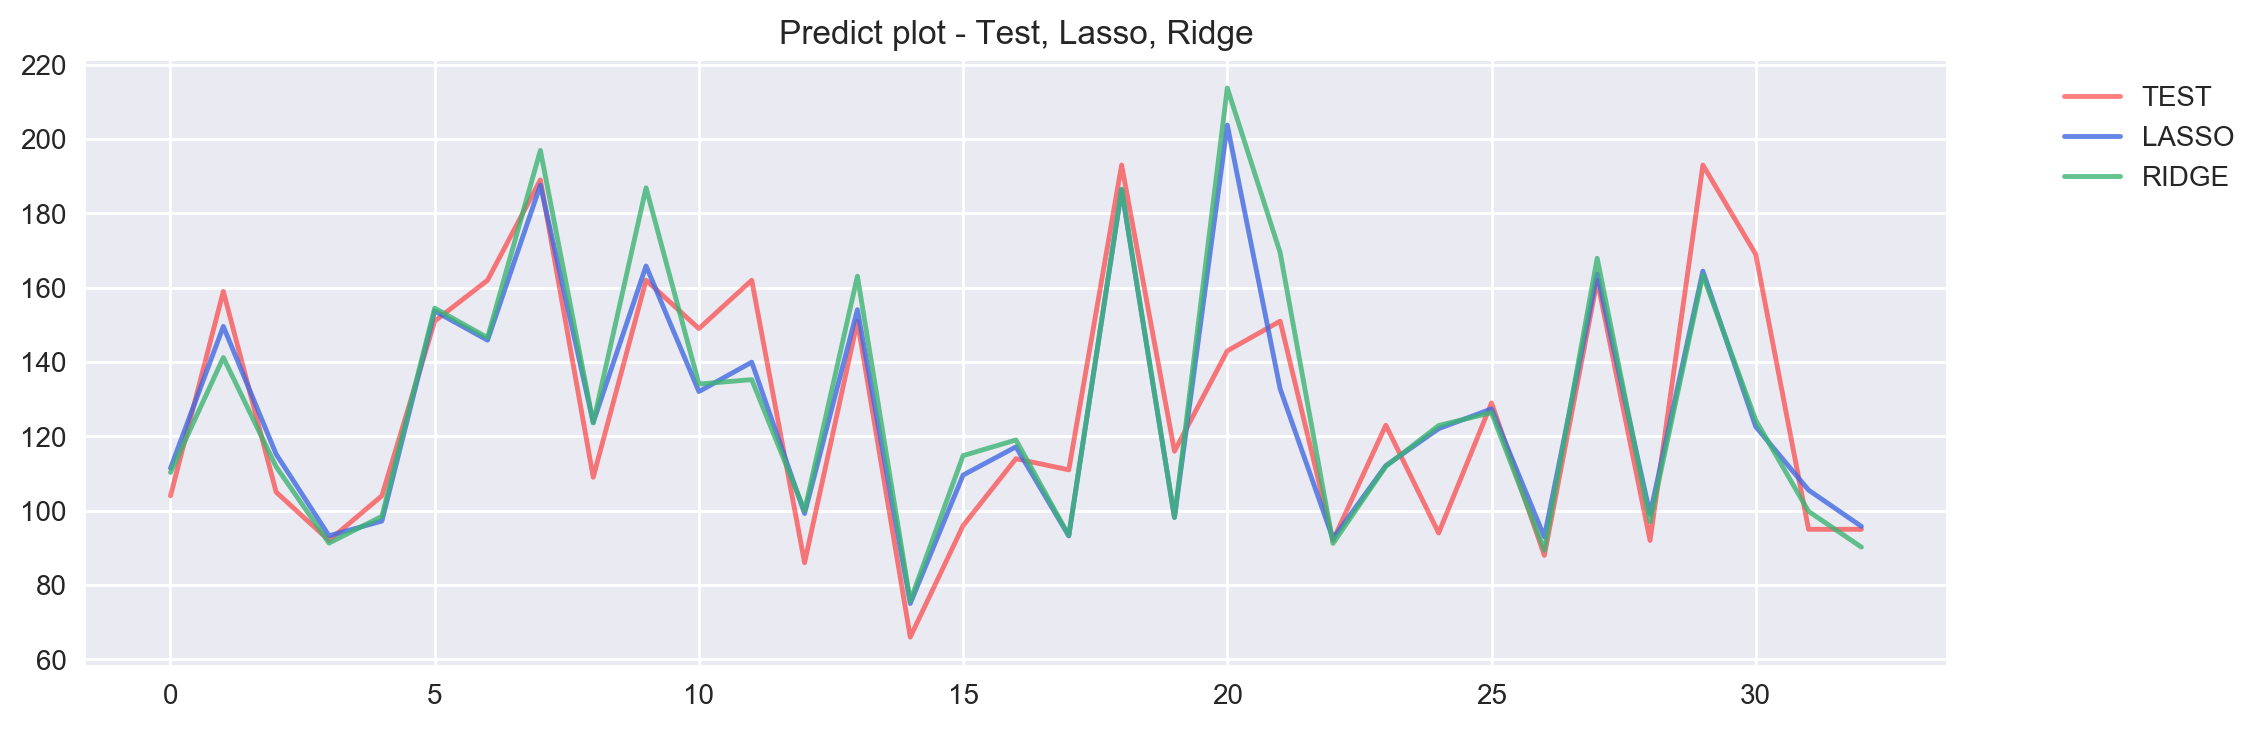

In [92]:
plt.figure(figsize=(12,4), dpi=200)
plt.plot(range(len(y_test)), np.exp(y_test), color="red", alpha=0.5, label="TEST")
plt.plot(range(len(y_test)), np.exp(lasso.predict(X_test)), color="royalblue", alpha=0.8, label="LASSO")
plt.plot(range(len(y_test)), np.exp(ridge.predict(X_test)), color="mediumseagreen", alpha=0.8, label="RIDGE")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title("Predict plot - Test, Lasso, Ridge")
plt.show()

## MSE - Lasso, Ridge

In [103]:
from sklearn.metrics import mean_squared_error
print("LASSO REGRESSION's MSE :", mean_squared_error(np.exp(y_test), np.exp(lasso.predict(X_test))))
print("RIDGE REGRESSION's MSE :", mean_squared_error(np.exp(y_test), np.exp(ridge.predict(X_test))))

LASSO REGRESSION's MSE : 327.216473094
RIDGE REGRESSION's MSE : 402.715332119
